# **Market Insider - Data Science Batch 38**
### **Anggota:**
1. Achmad Hilman Shadiqin
2. Figo Akmal Munir
3. Andreawan Sofian
4. Nabilah Astiarini
5. Dzakwan Darussalam
6. Riyan Maula


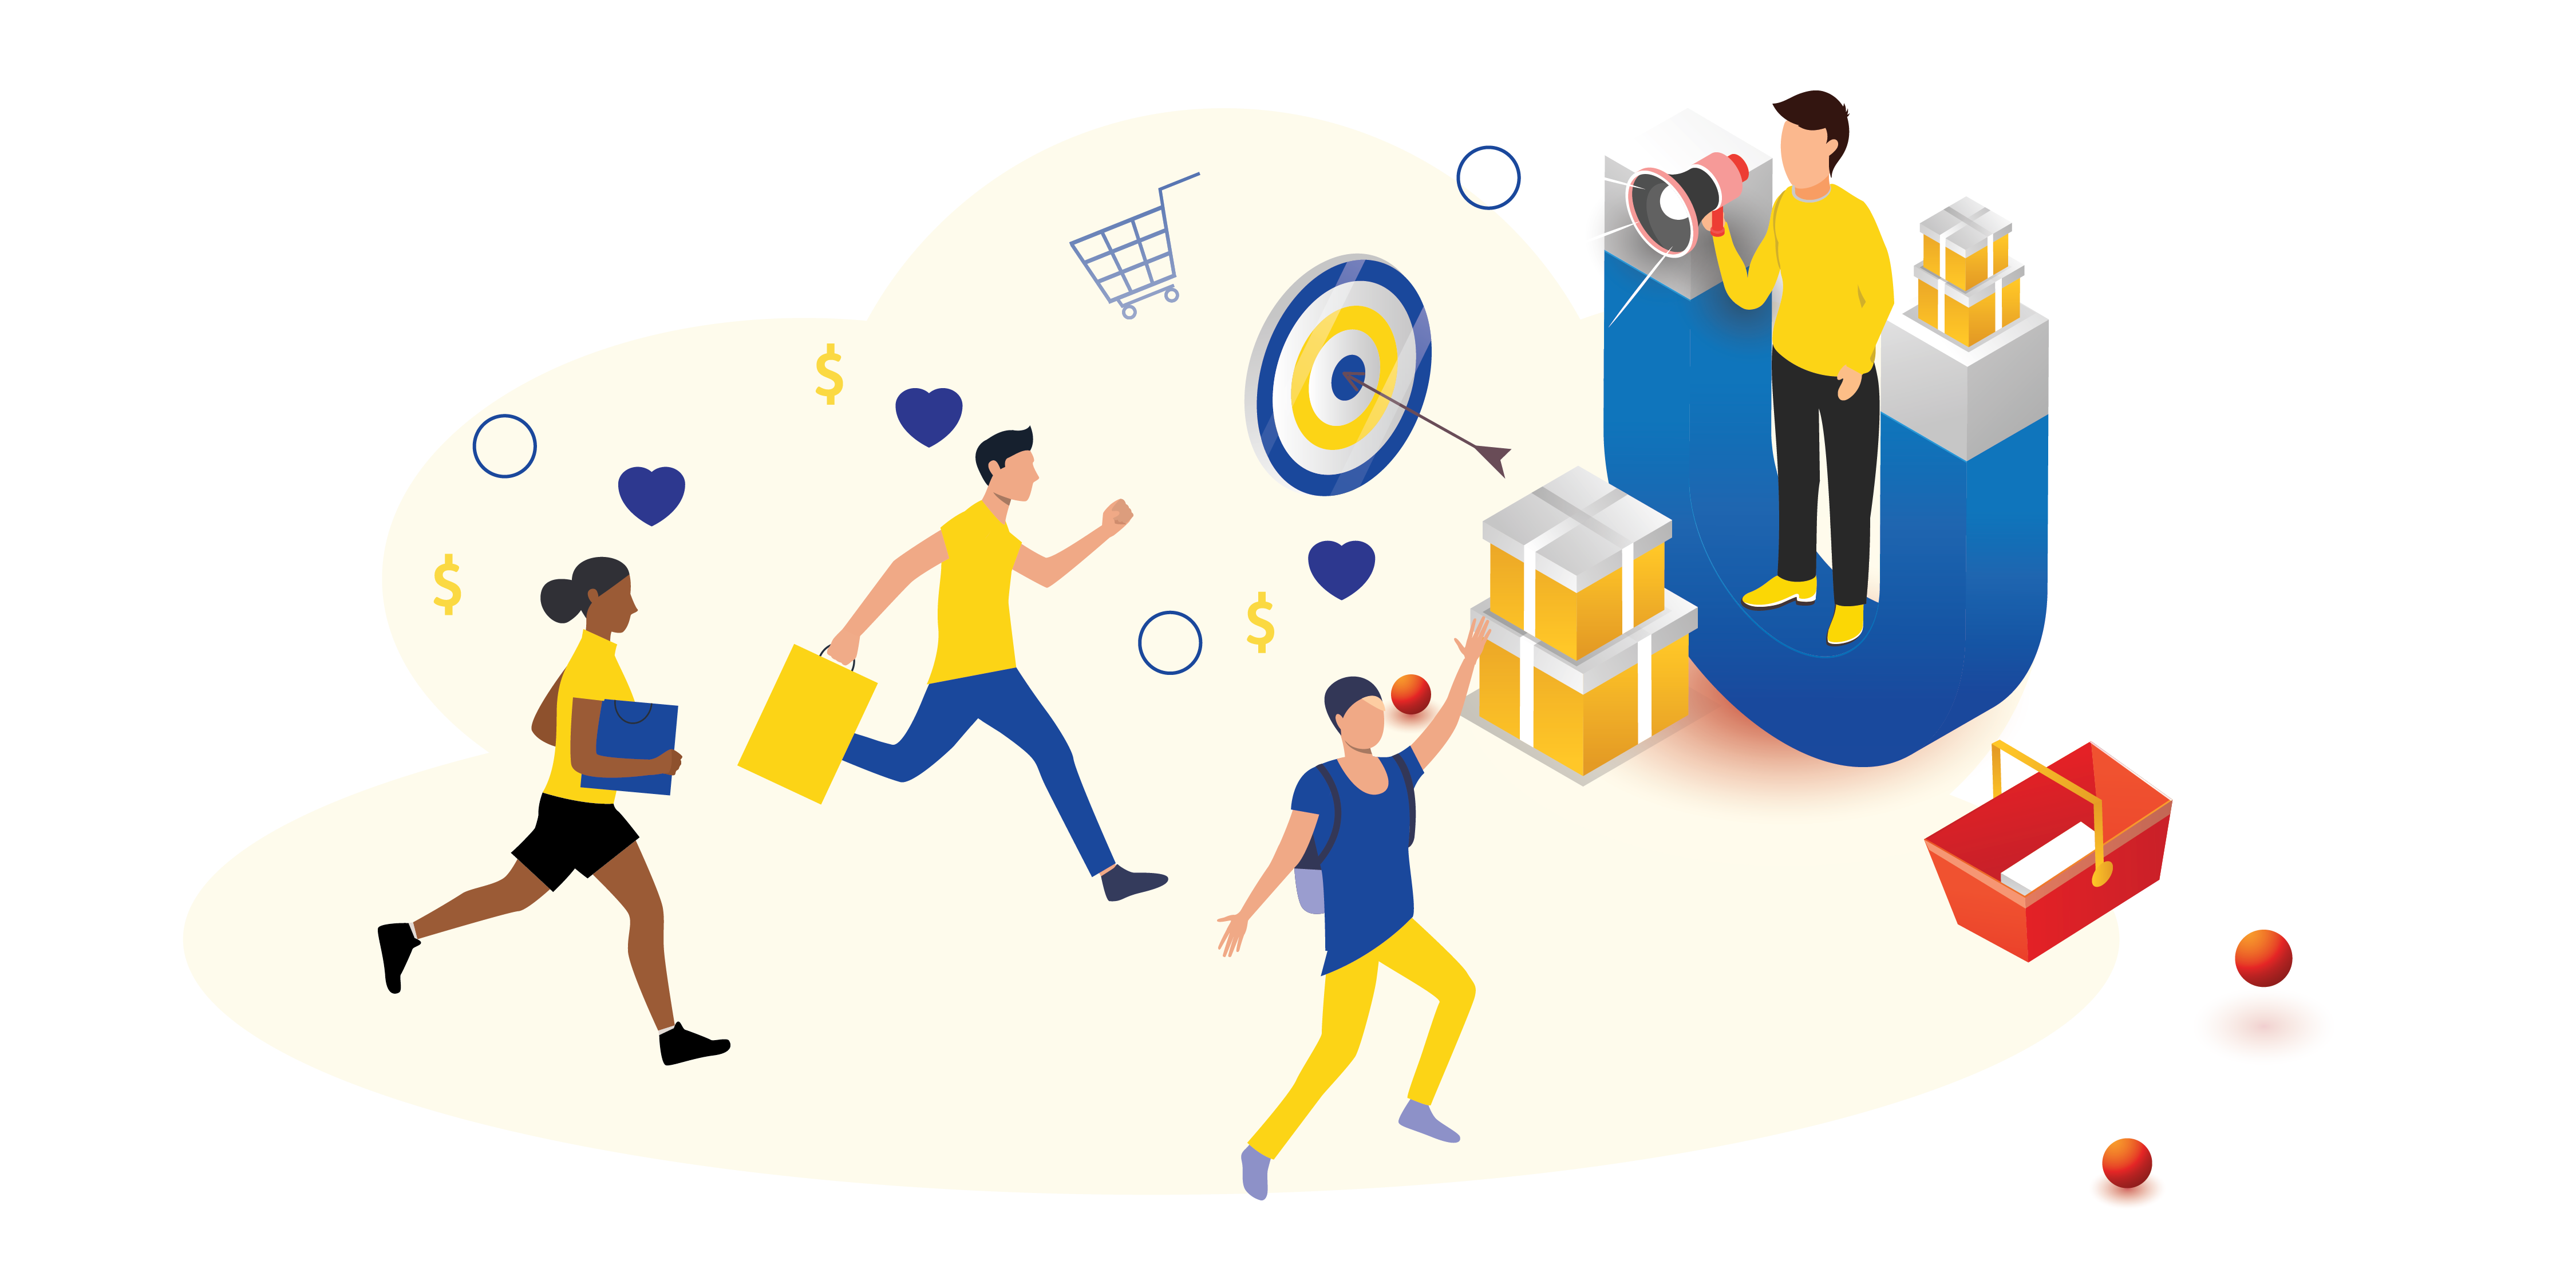

### **Table of Contents** <a id=100></a>
1. [Introduction](#1)
2. [Imports](#2)
3. [EDA + Business Insights](#3)
    - 3.1 [Descriptive Statistics](#3.1)
    - 3.2 [Univariate Analysis](#3.2)
    - 3.3 [Multivariate Analysis](#3.3)
    - 3.4 [Business Insights](#3.4)
4. [Data Pre-Processing](#4)
    - 4.0 [Splitting Data](#4.0)
    - 4.1 [Handling Missing Values](#4.1)
    - 4.2 [Handling Duplicates Values](#4.2)
    - 4.3 [Handling Outliers](#4.3)
    - 4.4 [Feature Extraction](#4.4)
    - 4.5 [Feature Encoding](#4.5)
    - 4.6 [Feature Transformation](#4.6)
    - 4.7 [Feature Selection](#4.7)
    - 4.8 [Imbalance Handling](#4.8)
5. [Machine Learning Modelling & Evaluation](#5)
    - 5.1 [Modeling](#5.1)
    - 5.2 [Evaluation](#5.2)
6. [Summary](#6)

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
import warnings
import os
import sys

notebook_path = '/content/drive/MyDrive/Final Project/Final Project - Marketing Campaign/'
sys.path.append(notebook_path)
warnings.filterwarnings('ignore')
print(os.listdir(notebook_path))

['marketing_campaign.csv', 'Final_Project_Marketing_Campaign (Development).ipynb', 'Final_Project_Marketing_Campaign.ipynb', 'Final_Project_Marketing_Campaign (Staging).ipynb']


In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **1. Introduction** <a id=1></a>
[back to top](#100)

### **Problem Statement**

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

### **Attributes**

**People**

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise

**Products**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumDealsPurchases: Number of purchases made with a discount
* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month

### **Acknowledgements**
O. Parr-Rud. Business Analytics Using SAS Enterprise Guide and SAS Enterprise Miner. SAS Institute, 2014.

### **Inspiration**
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

# **2. Imports** <a id=2></a>
[back to top](#100)

In [199]:
# import dan backup raw dataset
raw_data = pd.read_csv(notebook_path+'marketing_campaign.csv', sep=';')
data = raw_data.copy()
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# **3. EDA** <a id=3></a>
[back to top](#100)


## **3.1 Descriptive Statistics** <a id=3.1></a>

In [200]:
# menampilkan informasi dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [201]:
# total unique values setiap feature
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [202]:
# membuat function untuk mengidentifikasi data terduplikasi
def identify_duplicates(df):
    """
    Identify duplicated rows in a DataFrame and return a summary.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: A DataFrame containing information about duplicated rows.
    """
    # mencari baris yang terduplikasi
    duplicate_rows = df[df.duplicated()]

    # menghitng jumlah row yang terduplikasi
    duplicate_count = len(duplicate_rows)

    # membuat dataframe untuk menampilkan jumlah row beserta persentase data yang terduplikasi
    if duplicate_count > 0:
        duplicate_info = pd.DataFrame({
            'duplicated rows': [duplicate_count],
            'percentage': round((duplicate_count / len(df) * 100), 2)
        })
    else:
        duplicate_info = pd.DataFrame({
            'duplicated rows': [0],
            'percentage': [0.0]
        })

    return duplicate_info

In [203]:
# menampikan data shape dan memanggil function untuk mengidentikasi data yang terduplikasi
identify_duplicates(data)

duplicated rows  percentage
0                0         0.0

In [204]:
# menampilkan row data terduplikasi
data[data.duplicated()][['Education','Marital_Status','Income']].sort_values(by=['Education','Marital_Status','Income'])

Empty DataFrame
Columns: [Education, Marital_Status, Income]
Index: []

In [205]:
# drop columns yang tidak terpakai, karena nilai pada kolom semuanya unique sehingga tidak bisa di track journey dari pelanggan (ID) nilai pada kolom hanya memiliki 1 nilai unique (Z_CostContact, Z_Revenue)
data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [206]:
# mengubah tipe data Dt_customer dari object menjadi datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [207]:
# memisahkan feature berdasarkan tipe data
numeric_cols = []
object_cols = []
datetime_cols = []

# melakukan perulangan setiap feature sesuai dengan tipe data
for col in data.columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        numeric_cols.append(col)
    elif data[col].dtype == 'object':
        object_cols.append(col)
    else:
        datetime_cols.append(col)

# print hasilnya yang disimpan pada masing-masing feature
print(f'Total Numeric Columns : {len(numeric_cols)}')
print(f'Total Object Columns  : {len(object_cols)}')
print(f'Total Datetime Columns: {len(datetime_cols)}')

Total Numeric Columns : 23
Total Object Columns  : 2
Total Datetime Columns: 1


In [208]:
# memisahkan feature berdasarkan klasifikasinya
personal_cols = []
spending_cols = []
purchase_cols = []
campaign_cols = []

# melakukan perulangan setiap feature sesuai dengan klasifikasinya
for col in data.columns:
    if col in 'Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Complain':
        personal_cols.append(col)
    elif col in 'MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds':
        spending_cols.append(col)
    elif col in 'NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth':
        purchase_cols.append(col)
    elif col in 'AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response, NumDealsPurchases':
        campaign_cols.append(col)

# mengurutkan hasilnya sesuai dengan alphabet
personal_cols.sort()
spending_cols.sort()
purchase_cols.sort()
campaign_cols.sort()

# print hasilnya yang disimpan pada masing-masing feature
print(f'Personal Columns: {personal_cols}')
print(f'Spending Columns: {spending_cols}')
print(f'Purchase Columns: {purchase_cols}')
print(f'Campaign Columns: {campaign_cols}')

Personal Columns: ['Complain', 'Dt_Customer', 'Education', 'Income', 'Kidhome', 'Marital_Status', 'Recency', 'Teenhome', 'Year_Birth']
Spending Columns: ['MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']
Purchase Columns: ['NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
Campaign Columns: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']


In [209]:
# descriptive statistics pada feature bertipe data numerik
data[numeric_cols].describe(percentiles=list(np.linspace(0.1, 0.9,9))).T

count          mean           std     min      10%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1952.0   
Income               2216.0  52247.251354  25173.076661  1730.0  24117.5   
Kidhome              2240.0      0.444196      0.538398     0.0      0.0   
Teenhome             2240.0      0.506250      0.544538     0.0      0.0   
Recency              2240.0     49.109375     28.962453     0.0      9.0   
MntWines             2240.0    303.935714    336.597393     0.0      6.0   
MntFruits            2240.0     26.302232     39.773434     0.0      0.0   
MntMeatProducts      2240.0    166.950000    225.715373     0.0      7.0   
MntFishProducts      2240.0     37.525446     54.628979     0.0      0.0   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      0.0   
MntGoldProds         2240.0     44.021875     52.167439     0.0      3.0   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.0   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      1.0   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.0   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      2.0   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      2.0   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.0   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.0   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.0   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.0   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.0   
Complain             2240.0      0.009375      0.096391     0.0      0.0   
Response             2240.0      0.149107      0.356274     0.0      0.0   

                         20%      30%      40%      50%      60%      70%  \
Year_Birth            1957.0   1962.0   1966.0   1970.0   1973.0   1976.0   
Income               32011.0  38198.5  44529.0  51381.5  58482.0  65247.5   
Kidhome                  0.0      0.0      0.0      0.0      1.0      1.0   
Teenhome                 0.0      0.0      0.0      0.0      1.0      1.0   
Recency                 19.0     29.0     39.0     49.0     59.0     69.0   
MntWines                16.0     34.0     81.0    173.5    284.4    418.6   
MntFruits                1.0      2.0      4.0      8.0     15.0     25.0   
MntMeatProducts         12.0     20.0     35.0     67.0    108.4    177.0   
MntFishProducts          2.0      3.0      7.0     12.0     20.0     37.0   
MntSweetProducts         1.0      2.0      5.0      8.0     14.0     26.0   
MntGoldProds             6.0     11.0     17.0     24.0     34.0     46.0   
NumDealsPurchases        1.0      1.0      1.0      2.0      2.0      3.0   
NumWebPurchases          2.0      2.0      3.0      4.0      4.0      5.0   
NumCatalogPurchases      0.0      1.0      1.0      2.0      2.0      4.0   
NumStorePurchases        3.0      3.0      4.0      5.0      6.0      7.0   
NumWebVisitsMonth        3.0      4.0      5.0      6.0      6.0      7.0   
AcceptedCmp3             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp4             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp5             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp1             0.0      0.0      0.0      0.0      0.0      0.0   
AcceptedCmp2             0.0      0.0      0.0      0.0      0.0      0.0   
Complain                 0.0      0.0      0.0      0.0      0.0      0.0   
Response                 0.0      0.0      0.0      0.0      0.0      0.0   

                         80%      90%       max  
Year_Birth            1979.0   1984.0    1996.0  
Income               71819.0  79844.0  666666.0  
Kidhome                  1.0      1.0       2.0  
Teenhome                 1.0      1.0       2.0  
Recency                 79.0     89.0      99.0  
MntWines               581.2    822.1    1493.0 

In [210]:
# descriptive statistics pada feature bertipe data object/categorical
data[object_cols].describe().T

count unique         top  freq
Education       2240      5  Graduation  1127
Marital_Status  2240      8     Married   864

In [211]:
# descriptive statistics pada feature bertipe data datetime
data.describe(include='datetime').T

count unique        top freq      first       last
Dt_Customer  2240    663 2012-08-31   12 2012-07-30 2014-06-29

#### **Summary Descriptive Statistics**
1. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
   - Feature Dt_Customer merupakan tanggal registrasi pelanggan dengan tipe data object. Tipe data ini tidak sesuai, sehingga perlu diubah menjadi tipe Date Time.

2. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
   - Feature Income mempunyai nilai kosong karena hanya berjumlah 2216 rows.

3. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)
   - Feature ID merupakan identifikasi pelanggan. Berdasarkan analisis jumlah nilai unik pada feature tersebut, diketahui bahwa jumlahnya sama dengan jumlah baris dataset (2240), sehingga tidak memungkinkan untuk mengamati riwayat perjalanan pelanggan.
   - Feature Z_CostContact dan Z_Revenue hanya memiliki satu data unik, maka keduanya tidak akan memberikan hasil analisis yang signifikan.
   - Feature Dt_Customer, pelanggan paling terakhir melakukan registrasi di 29 Juni 2014, maka dengan asumsi saat ini adalah tahun 2014, ada keanehan pada Feature Year Birth dimana tahun lahir tertua ada di tahun 1893 atau usia pelanggan 121 tahun. Hal ini merupakan hal yang kurang masuk akal. Diduga terdapat kesalahan input tahun lahir oleh pelanggan/kesalahan pencatatan oleh sistem.
   - Feature Income memiliki keanehan karena memiliki nilai maksimum mencapai ratusan ribu (666.666), sedangkan nilai ukuran pemusatan dan penyebarannya hanya mencapai puluhan ribu. Diduga nilai ini merupakan outlier yang disebabkan karena kesalahan input atau pencatatan oleh sistem.
   - Feature MntFishProducts, MntFruits, MntGoldProds, MntMeatProducts, MntSweetProducts, MntWines memiliki keanehan dilihat dari nilai maksimumnya yang jauh dari nilai ukuran pemusatan atau ukuran penyebaran lainnya. Sehingga diduga terdapat nilai outlier pada feature tersebut.
   - Feature Marital Status memiliki keanehan karena memiliki 8 nilai unik. Maka pada tahap selanjutnya akan dianalisis lebih dalam setiap nilai pada feature ini.

## **3.2 Univariate Analysis** <a id=3.2></a>

### **3.2.1 Distribution of Numerical Feature** <a id=3.2.1></a>

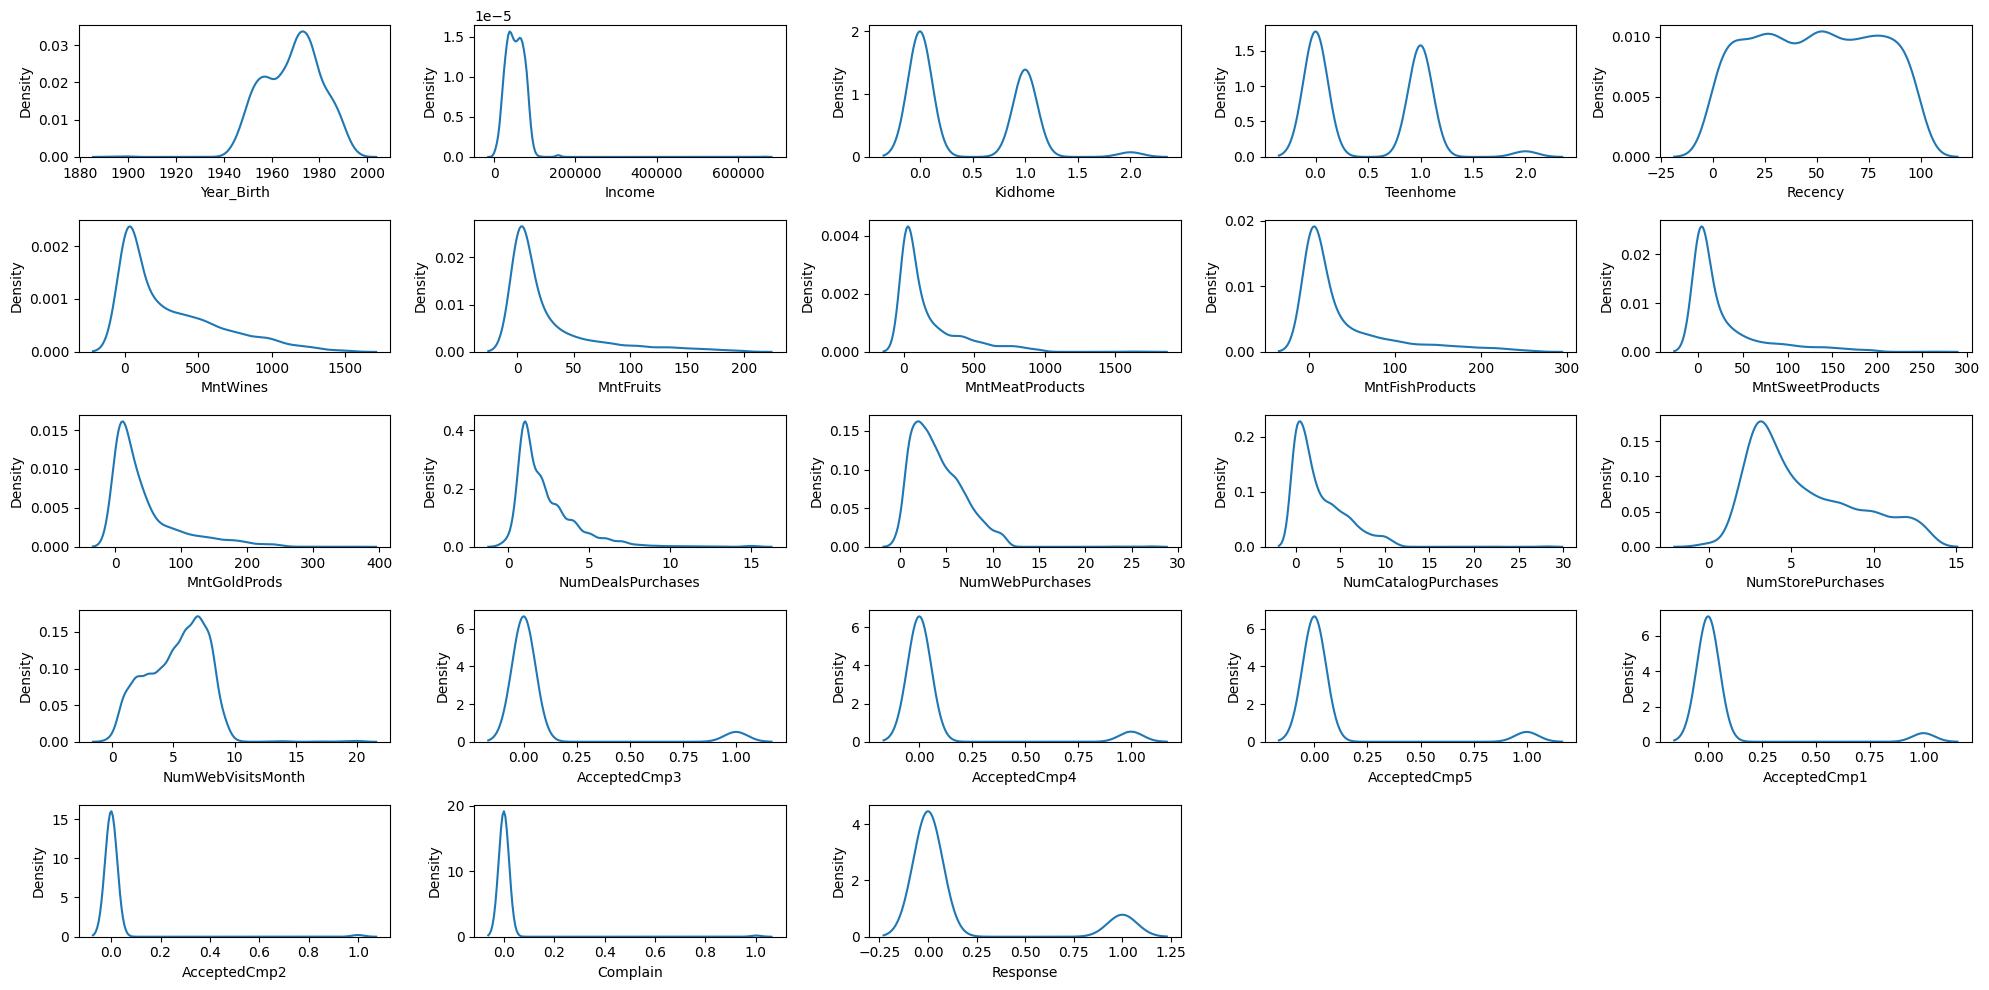

In [212]:
# menampilkan distribusi feature numerik
plt.figure(figsize=(20, 10))
for i in range(0, len(numeric_cols)):
    plt.subplot(5, 5, i+1)
    sns.kdeplot(data[numeric_cols[i]])
    plt.tight_layout()

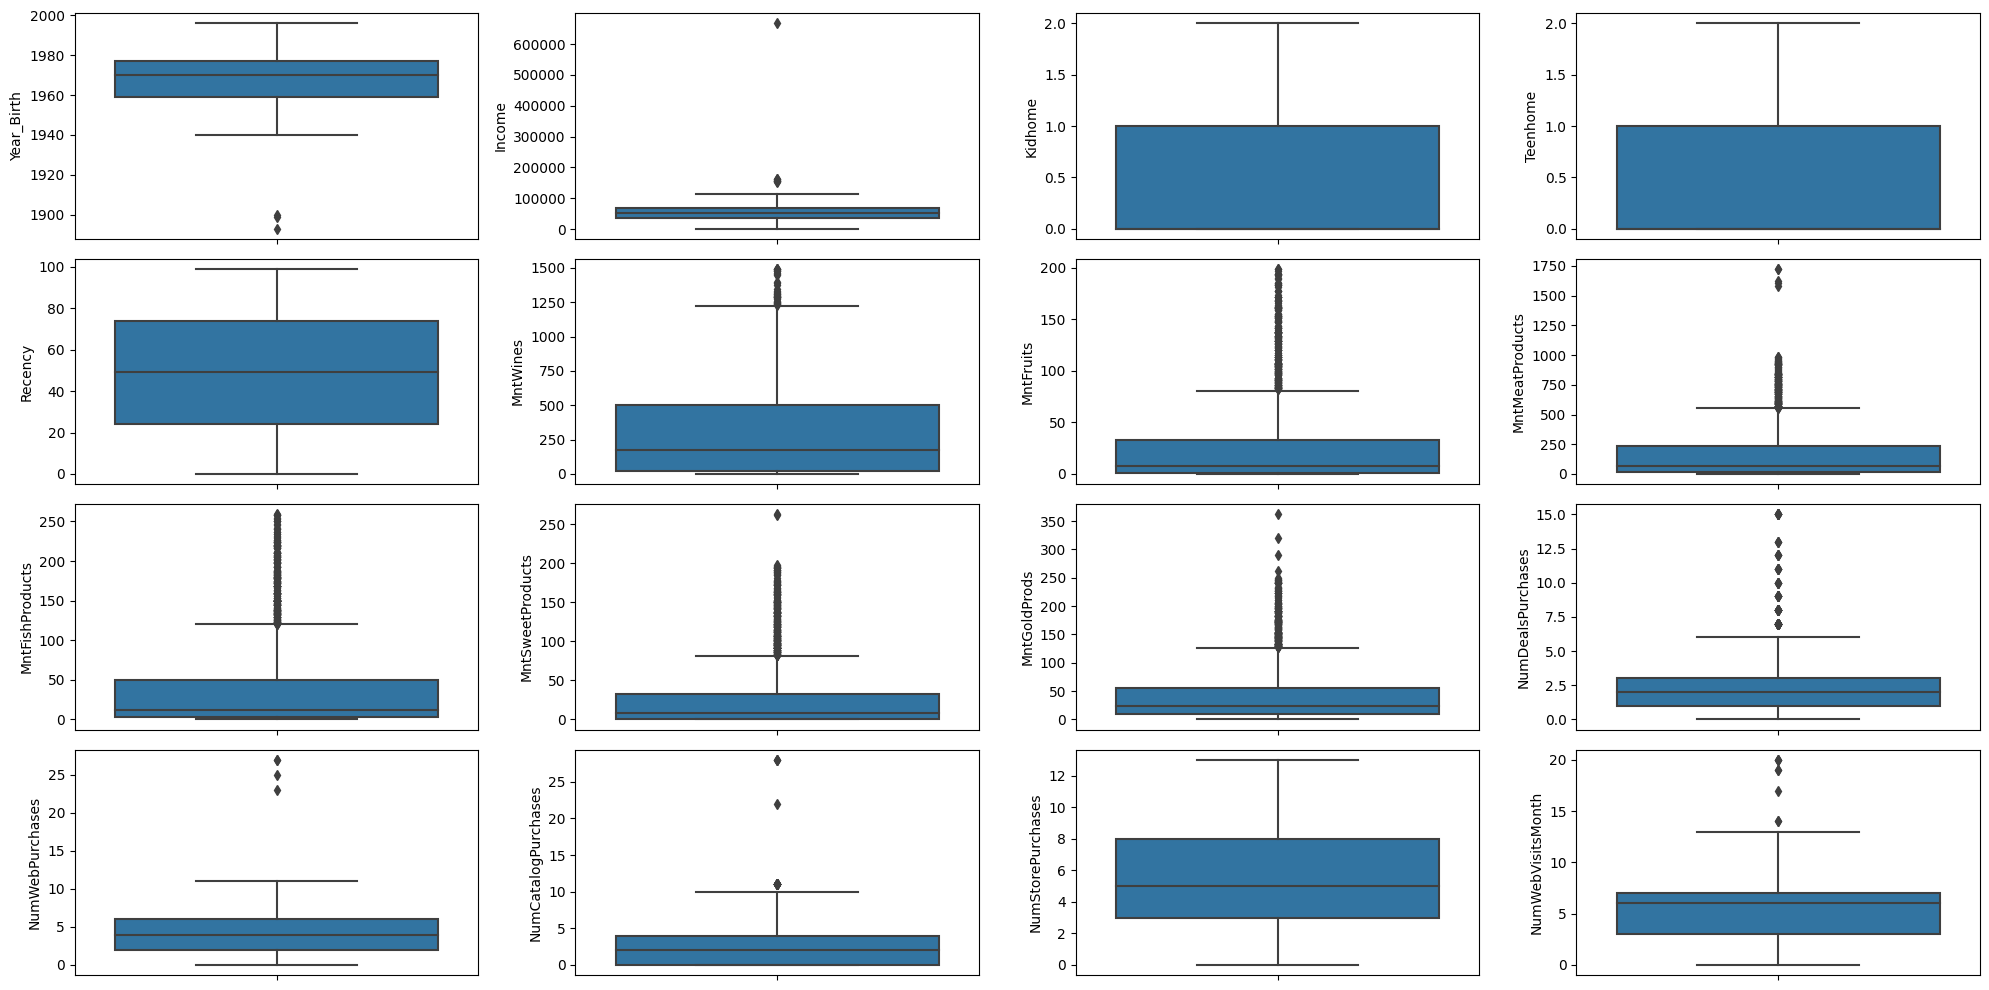

In [213]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numeric_cols[:-7])):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data[numeric_cols[i]])
    plt.tight_layout()

### **3.2.2 Distribution of Categorical Feature** <a id=3.2.2></a>

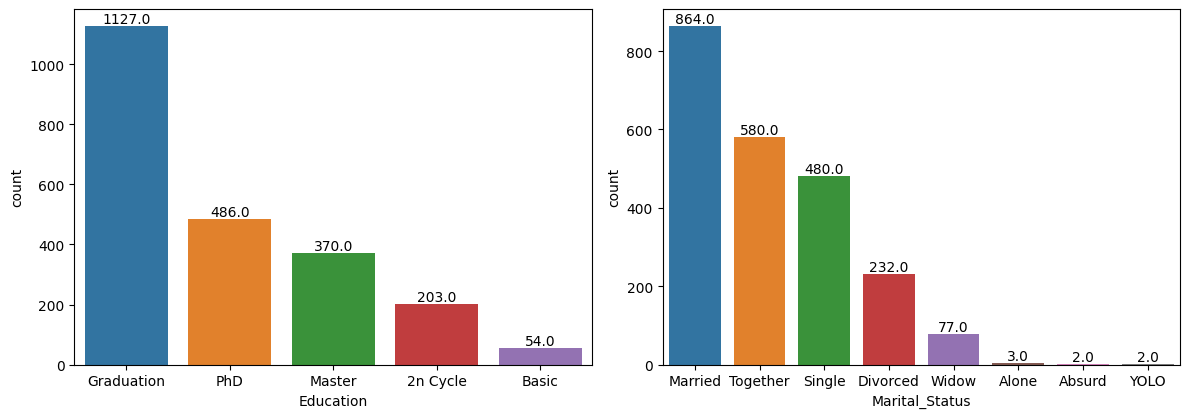

In [214]:
# setup ukuran figure
plt.figure(figsize=(12, 8))

# iterasi untuk setiap kolom objek
for i in range(0, len(object_cols)):
    # mendapatkan urutan kategori berdasarkan jumlah masing-masing
    order = raw_data[object_cols[i]].value_counts().index

    # membuat subplot
    plt.subplot(2, len(object_cols), i + 1)

    # countplot dengan urutan kategori yang diinginkan
    ax = sns.countplot(x=raw_data[object_cols[i]], order=order)

    # menambahkan label di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # setup pada xticks
    plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

### **3.2.3 Distribution of Datetime Feature** <a id=3.2.3></a>

In [215]:
# membuat function untuk menampilkan trend distribusi pelanggan yang melakukan registrasi/enrollment setiap bulannya
def monthly_distribution(data, date_col, figsize=(12, 5)):
    """
    fungsi untuk membuat plot distribusi bulanan dari kolom datetime.

    parameters:
    - data: dataframe, data yang akan diplot
    - date_col: str, nama kolom datetime
    - figsize: tuple, ukuran gambar, default=(12, 5)

    returns:
    - none
    """
    # setup subplot untuk line plot
    fig, ax = plt.subplots(figsize=figsize)

    # resample data dan hitung jumlah bulanan
    monthly_counts = data.resample('M', on=date_col).size()

    # plot line distribusi datetime (per bulan)
    ax.plot(monthly_counts.index, monthly_counts.values,
            marker='o', linestyle='-')
    ax.set_title(f'Customer Registration Distribution Trends')
    ax.set_xlabel(date_col)
    ax.set_ylabel('frekuensi')

    # memutar label pada sumbu x agar lebih mudah dibaca
    plt.xticks(rotation=45)

    # membuat indeks bulanan dari Juli 2012 hingga Juni 2014
    monthly_index = pd.date_range(
        start='2012-07-01', end='2014-06-30', freq='M')

    # melakukan reindex dengan nilai pada variabel monthly_index
    monthly_counts = monthly_counts.reindex(monthly_index, fill_value=0)

    # mengubah format xticklabels menjadi nama bulan-tahun
    month_year_labels = [date.strftime('%b-%Y')
                         for date in monthly_counts.index]
    ax.set_xticks(monthly_counts.index)
    ax.set_xticklabels(month_year_labels)

    # menampilkan plot
    plt.tight_layout()
    plt.show()

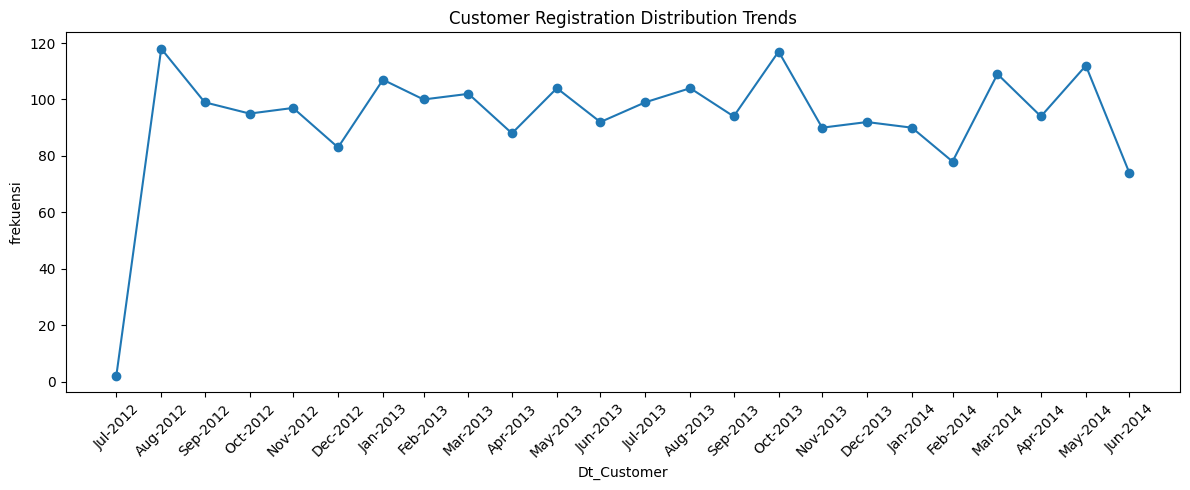

In [216]:
# memanggil function menampilkan trend pelanggan yang registrasi/enrollment
monthly_distribution(data, 'Dt_Customer')

## **3.3 Multivariate Analysis** <a id=3.3></a>

### **3.3.1 Based on Datetime Analysis** <a id=3.3.1></a>

In [217]:
# membuat function untuk menampilkan trend distribusi pelanggan yang melakukan registrasi/enrollment setiap bulannya bersadarkan response
def monthly_distribution1(data, date_col, figsize=(12, 5)):
    """
    fungsi untuk membuat plot distribusi bulanan dari kolom datetime.

    parameters:
    - data: dataframe, data yang akan diplot
    - date_col: str, nama kolom datetime
    - figsize: tuple, ukuran gambar, default=(12, 5)

    returns:
    - none
    """
    # setup subplot untuk line plot
    fig, ax = plt.subplots(figsize=figsize)

    # resample data dan hitung jumlah bulanan untuk response = 0
    monthly_counts_0 = data[data['Response'] == 0].resample('M', on='Dt_Customer').size()

    # plot line distribusi datetime (per bulan) untuk response = 0
    ax.plot(monthly_counts_0.index, monthly_counts_0.values,
            marker='o', linestyle='-', label='Response = 0', color = "#FF0000")

    # resample data dan hitung jumlah bulanan untuk response = 1
    monthly_counts_1 = data[data['Response'] == 1].resample('M', on='Dt_Customer').size()

    # plot line distribusi datetime (per bulan) untuk response = 1
    ax.plot(monthly_counts_1.index, monthly_counts_1.values,
            marker='o', linestyle='-', label='Response = 1', color = "#87CEEB")

    # Set title, xlabel, dan ylabel
    ax.set_title('Customer Registration Distribution Trends')
    ax.set_xlabel('Dt_Customer')
    ax.set_ylabel('Frekuensi')

    # memutar label pada sumbu x agar lebih mudah dibaca
    plt.xticks(rotation=45)

    # membuat indeks bulanan dari Juli 2012 hingga Juni 2014
    monthly_index = pd.date_range(
        start='2012-07-01', end='2014-06-30', freq='M')

    # melakukan reindex dengan nilai pada variabel monthly_index untuk response = 0
    monthly_counts_0 = monthly_counts_0.reindex(monthly_index, fill_value=0)

    # melakukan reindex dengan nilai pada variabel monthly_index untuk response = 1
    monthly_counts_1 = monthly_counts_1.reindex(monthly_index, fill_value=0)

    # mengubah format xticklabels menjadi nama bulan-tahun
    month_year_labels = [date.strftime('%b-%Y')
                         for date in monthly_index]
    ax.set_xticks(monthly_index)
    ax.set_xticklabels(month_year_labels)

    # Menambah legenda
    ax.legend()

    # menampilkan plot
    plt.tight_layout()
    plt.show()

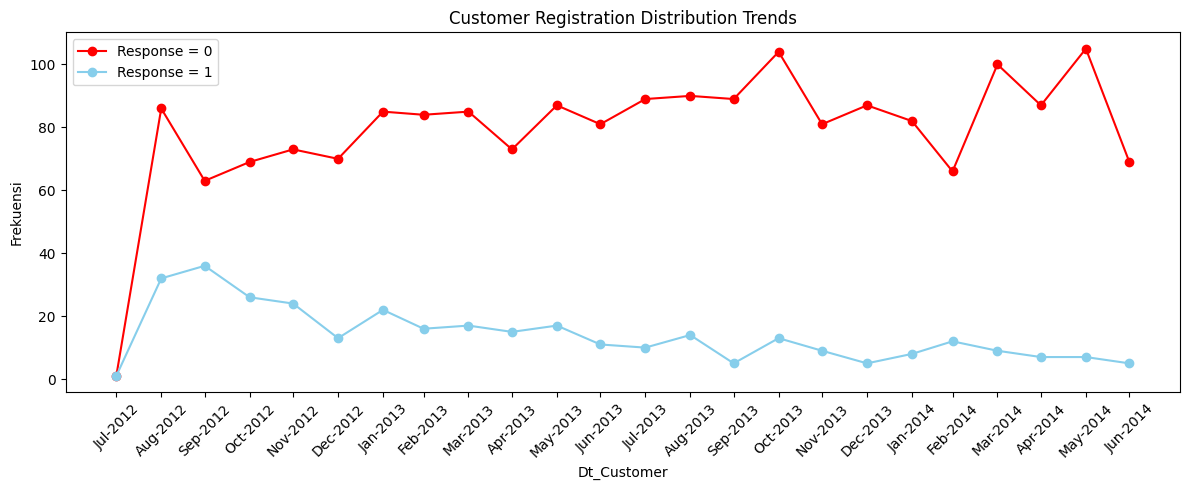

In [218]:
# memanggil function menampilkan trend pelanggan yang registrasi/enrollment berdasarkan response
monthly_distribution1(data, 'Dt_Customer')

### **3.3.2 Based on Regression Line** <a id=3.3.2></a>

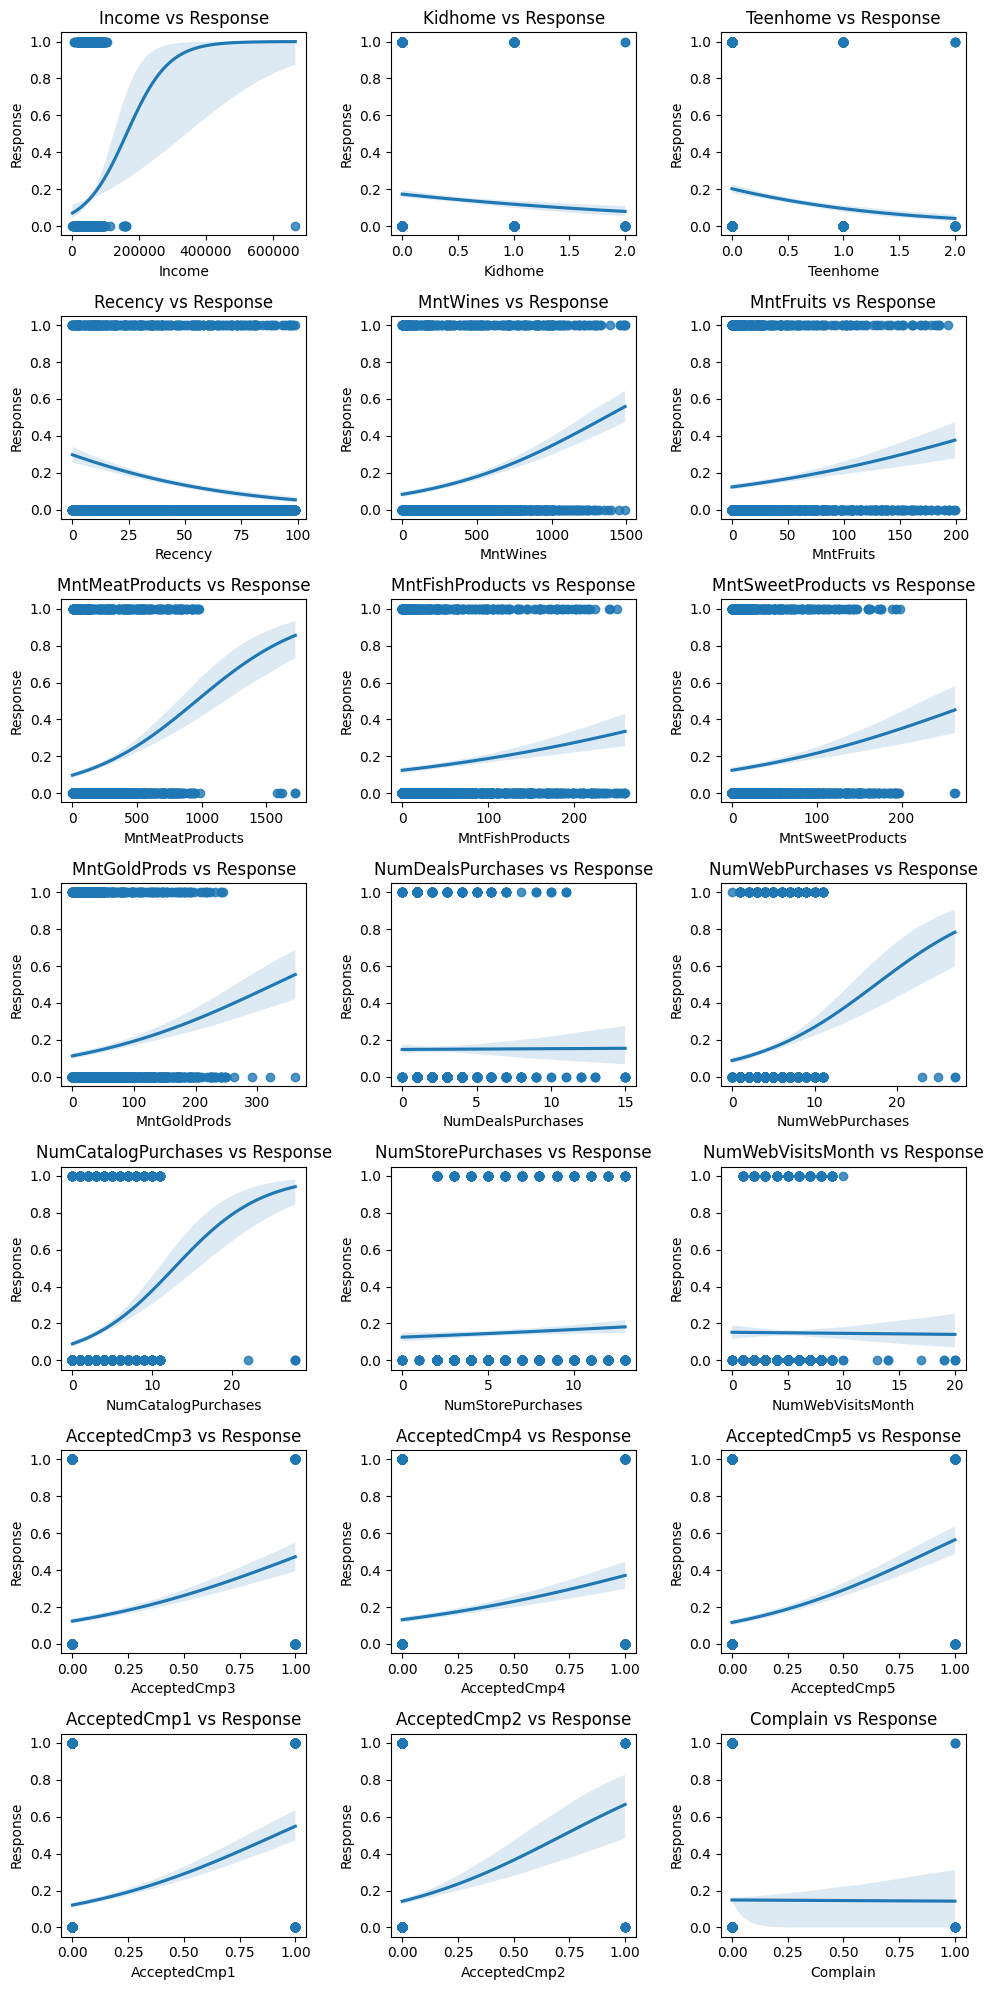

In [219]:
# regplot setiap feature ke target
plt.figure(figsize=(10, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(data[numeric_cols[1:-1]]):
    plt.subplot(7, 3, i+1)
    sns.regplot(data=data, x=data[col], y=data['Response'], logistic=True)
    plt.title(f'{col} vs Response')
    plt.xlabel(f'{col}')
    plt.ylabel('Response')

plt.tight_layout()
plt.show()

### **3.3.3 Percentage of Response Based on Categorical Feature** <a id=3.3.3></a>

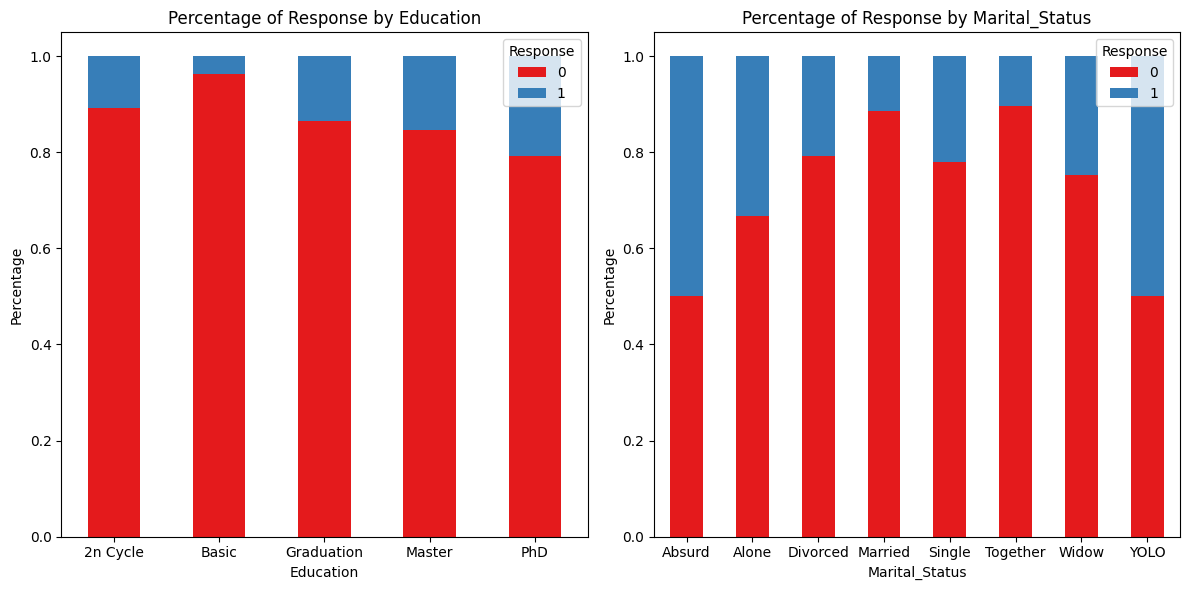

In [220]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = sns.color_palette('Set1')[:2]

# plot untuk 'Education'
education_counts = data.groupby('Education')['Response'].value_counts(normalize=True).unstack()
education_counts.plot(kind='bar', stacked=True, color=colors ,ax=axes[0])
axes[0].set_title('Percentage of Response by Education')
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(education_counts.index, rotation=0, ha='center')  # Rotate x-axis labels

# plot untuk 'Marital_Status'
marital_counts = data.groupby('Marital_Status')['Response'].value_counts(normalize=True).unstack()
marital_counts.plot(kind='bar', stacked=True, color=colors ,ax=axes[1])
axes[1].set_title('Percentage of Response by Marital_Status')
axes[1].set_ylabel('Percentage')
axes[1].set_xticklabels(marital_counts.index, rotation=0, ha='center')  # Rotate x-axis labels

plt.tight_layout()
plt.show()

### **3.3.4 Based on Correlation Coefficient (Heatmap)** <a id=3.3.4></a>

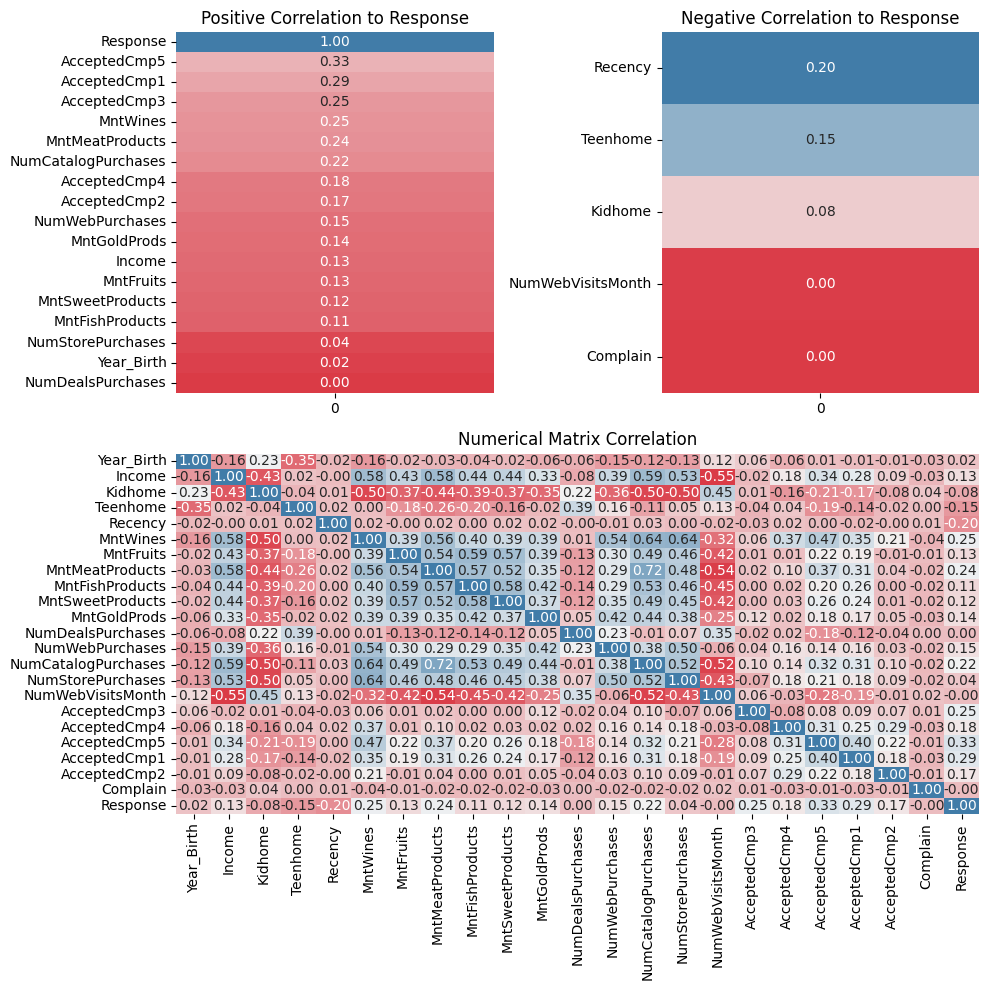

In [221]:
# menghitung korelasi dengan Response
CORR_pos = data.corrwith(data['Response'], axis=0, method='pearson', drop=False).sort_values(ascending=False)
positive_corr = CORR_pos[CORR_pos > 0]
top_positive_corr = positive_corr

CORR_neg = data.corrwith(data['Response'], axis=0, method='pearson', drop=False).sort_values(ascending=True)
negative_corr = CORR_neg[CORR_neg < 0]
top_negative_corr = negative_corr.abs()

cmap = sns.diverging_palette(10, 240, as_cmap=True)

# subplot untuk heatmap positif dan negatif
plt.figure(figsize=(10, 10))

# heatmap positif
plt.subplot(2, 2, 1)
sns.heatmap(top_positive_corr.to_frame(), annot=True, fmt=".2f", cbar=False, cmap=cmap)
plt.title('Positive Correlation to Response')

# heatmap negatif
plt.subplot(2, 2, 2)
sns.heatmap(top_negative_corr.to_frame(), annot=True, fmt=".2f", cbar=False, cmap=cmap)
plt.title('Negative Correlation to Response')

# heatmap multikorelasi antar feature numerik
plt.subplot(2, 1, 2)
sns.heatmap(data.corr(), annot=True, fmt=".2f", cbar=False, cmap=sns.diverging_palette(10, 240, as_cmap=True))
plt.title('Numerical Matrix Correlation')

plt.tight_layout()
plt.show()

#### **Summary EDA**
1. Berdasarkan KDE Plot:
    - Normal Distribution:
        Recency memiliki distribusi yang mirip dengan distribusi normal.
    - Left-Skewed Distribution:
        Year_Birth menunjukkan kecondongan ke kiri dengan median yang lebih tinggi daripada mean.
    - Right-Skewed Distribution:
        Income dan beberapa features terkait pembelian produk menunjukkan kecondongan ke kanan, dengan mean yang lebih tinggi daripada median.
    - Bimodal Distribution:
        Kidhome dan Teenhome menunjukkan dua puncak dalam distribusinya.
    - Binary Dominated Distribution:
        Features seperti AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, dan Responsee didominasi oleh nilai 0.

2. Berdasarkan Box Plot:
    - Year_Birth dan Income memiliki outlier, yang mungkin perlu dicermati lebih lanjut.
    - Pada beberapa features terkait pembelian produk (MntFishProducts, MntFruits, MntGoldProds, MntMeatProducts, MntSweetProducts, MntWines), serta features terkait aktivitas pembelian (NumCatalogPurchases, NumDealsPurchases, NumStorePurchases, NumWebPurchases, NumWebVisitsMonth), terdapat banyak nilai outlier pada nilai tinggi, menunjukkan variasi yang signifikan dalam pola pembelian atau aktivitas pelanggan.

3. Berdasarkan Count Plot (Categorical Feature):
    - Level Pendidikan:
        Mayoritas pelanggan memiliki tingkat pendidikan "Graduation," menunjukkan target pasar utama.
    - Status Perkawinan:
        Mayoritas pelanggan memiliki status perkawinan "Married," menunjukkan dominasi pasangan dalam populasi pelanggan.
    - Pertimbangan Tambahan:
    Perlu penelitian lebih lanjut untuk memahami definisi "Basic" dan "2n Cycle" dalam konteks ini.
Status perkawinan "Alone," "Absurd," dan "YOLO" perlu dipahami lebih lanjut dan mungkin dianggap sebagai data yang tidak valid atau perlu dicermati secara khusus.

4. Berdasarkan Lineplot (Datetime Feature):
    - Terdapat fluktuasi dalam pendaftaran pelanggan selama periode Juli-2012 hingga Juni-2014.
    - Puncak pendaftaran terjadi pada bulan Agustus-2012 dan Oktober-2013.
    - Tren menunjukkan jumlah pendaftaran yang lebih rendah pada awal dan akhir periode, menunjukkan potensi pola musiman atau faktor lain yang memengaruhi pendaftaran pelanggan.

5. Berdasarkan Regression Plot (Numerical Feature vs Target)
    - Beberapa faktor seperti pendapatan, jumlah anak, recency, dan tahun kelahiran pelanggan memiliki korelasi yang kuat terhadap kemungkinan pelanggan merespon.
    - Spending pada produk tertentu, terutama MeatProducts, juga memiliki korelasi positif yang signifikan dengan Response.
    - Jenis pembelian melalui Katalog dan Web memberikan kontribusi positif yang signifikan terhadap kemungkinan pelanggan merespon, sementara pembelian dengan diskon atau melalui toko fisik tidak menunjukkan korelasi yang signifikan.
    - Campaign (AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5) juga memiliki korelasi positif yang signifikan terhadap Response.

6. Berdasarkan Lineplot (Datetime Feature vs Target)
    - Pada rentang waktu Juli 2012 hingga Juni 2014, lebih banyak pelanggan yang mendaftar namun tidak merespon campaign.
    - Puncak pendaftaran dan respon terjadi pada Agustus 2012 - September 2012, namun jumlahnya cenderung menurun hingga akhir periode.
    - Analisis ini memberikan gambaran tentang dinamika pendaftaran dan respon campaign selama periode tersebut, yang dapat menjadi dasar untuk strategi pemasaran yang lebih efektif di masa depan.

7. Berdasarkan Stacked Bar (Categorical Feature,normalize vs Target)
    
    **Insight Response Campaign Berdasarkan Tingkat Pendidikan:**
    
    1. Tingkat Response Tinggi pada Tingkat Pendidikan Tinggi:
        - Pelanggan dengan tingkat pendidikan **PhD (20.78%)** memiliki tingkat Response Campaign tertinggi.
        - Diikuti oleh **Master (15.41%)** dan **Graduation (13.48%)**.
        - Tingkat pendidikan tinggi berkorelasi positif dengan kemungkinan merespon Campaign.

    2. Varian Response pada Tingkat Pendidikan Rendah:
        - Tingkat Response lebih bervariasi pada tingkat pendidikan rendah.
        - **Basic (3.70%)** menunjukkan Response lebih rendah dibandingkan dengan **2n Cycle (10.84%)** dan **Graduation (13.49%)**.
        - Pelanggan dengan tingkat pendidikan rendah cenderung memiliki tingkat Response yang lebih rendah.

    3. Pentingnya Pendidikan dalam Pengaruh Response:
        - Pelanggan dengan tingkat pendidikan tinggi, seperti PhD dan Master, cenderung lebih Responsif terhadap Campaign.
        - Informasi ini dapat menjadi kunci dalam merancang Campaign yang lebih efektif dan menargetkan kelompok pelanggan yang lebih cenderung merespon berdasarkan tingkat pendidikan mereka.

    **Insight Response Campaign Berdasarkan Status Perkawinan:**

    1. Perbedaan Signifikan pada Tingkat Response:
        - Terdapat perbedaan signifikan dalam tingkat Response Campaign antara status perkawinan.
        - **"Married"** memiliki tingkat Response yang lebih rendah (11.34%) dibandingkan dengan **"Divorced" (20.69%)**, **"Single" (22.08%)**, dan **"Together" (10.35%)**.

    2. Tingkat Response Tinggi pada Status Perkawinan "Single" dan "Divorced":
        - **"Single"** dan **"Divorced"** menunjukkan tingkat Response Campaign yang lebih tinggi, masing-masing sebesar **22.08%** dan **20.69%**.
        - Status perkawinan ini dapat menjadi faktor penting dalam menentukan Response positif terhadap Campaign.

    3. Pentingnya Personalisasi Campaign untuk Setiap Status Perkawinan:
        - Perusahaan dapat mempertimbangkan strategi pemasaran yang lebih personal dan disesuaikan dengan masing-masing status perkawinan.
        - Status perkawinan seperti **"Married"** mungkin memerlukan pendekatan yang berbeda untuk meningkatkan Response Campaign.

8. Berdasarkan Korelasi Koefisien (Heatmap)

    **Pentingnya Korelasi Antara Feature:**

    1. **Korelasi Positif terhadap Target:**
        - Feature yang termasuk dalam campaign (AcceptedCmp1, AcceptedCmp2, dst.), feature yang termasuk dalam produk spending seperti (MntWines, MntMeatProducts, dst.), feature yang termasuk pada channel penjualan seperti (NumCatalogPurchases, NumWebPurchases, dst.) mempunyai korelasi positif terhadap target.
    2. **Korelasi Negatif terhadap Target:**
        - Hanya beberapa feature yang mempunyai nilai korelasi negatif terhadap target, yaitu Recency dan jumlah anak (Teenhome dan Kidhome).
    3. **Korelasi Tinggi Antara Beberapa Pasang Feature:**
        - Korelasi antara beberapa pasang feature cukup tinggi, menunjukkan adanya multicollinearity.
        - Contohnya, "MntMeatProducts" dengan “NumCatalogPurchases” (0.72), “MntWines” dengan dengan “NumCatalogPurchases” dan “NumStorePurchases” (0.64), "Income" dan beberapa feature pengeluaran makanan ("MntWines", "MntFruits", "MntMeatProducts").

    **Rekomendasi untuk Proses Modeling:**

    1. **Analisis Lanjut dan Seleksi Fitur:**
        - Analisis lebih lanjut diperlukan untuk memahami signifikansi feature-feature yang berkorelasi tinggi dan apakah mereka memiliki dampak domain yang penting.
        - Seleksi fitur dan evaluasi signifikansi fitur akan menjadi langkah kritis dalam proses modeling.
    2. **Penanganan Multicollinearity:**
        - Penerapan PCA bisa menjadi solusi untuk mengatasi multicollinearity dan mereduksi dimensi.
        - Perlu melakukan standarisasi atau normalisasi pada data sebelum menerapkan teknik ini.
    3. **Fokus pada Feature dengan Korelasi Tinggi terhadap Target:**
        - Perlu menganalisis feature-feature dengan korelasi tinggi terhadap target ("Response") karena kemungkinan memiliki kontribusi yang signifikan pada model.

## **3.4 Business Insights** <a id=3.4></a>

In [222]:
# menghitung jumlah responden dengan Yes Response tanpa menerima campaign manapun
no_campaign_response = len(data[(data['AcceptedCmp1'] == 0) & (data['AcceptedCmp2'] == 0) & (
    data['AcceptedCmp3'] == 0) & (data['AcceptedCmp4'] == 0) & (data['AcceptedCmp5'] == 0) & (data['Response'] == 1)])

# menghitung jumlah responden dengan Yes Response
total_yes_response = len(data[data['Response'] == 1])

# menghitung jumlah responden dengan Yes Response yang setidaknya menerima satu campaign
at_least_one_campaign_response = total_yes_response - no_campaign_response

# menampilkan hasil
print('Total Yes Response:', total_yes_response)
print('Yes Response without accepting any campaigns:', no_campaign_response)
print('Yes Response accepting at least one campaign:',
      at_least_one_campaign_response)

# menampilkan proporsi dalam persentase
percentage_no_campaign_response = (
    no_campaign_response / total_yes_response) * 100
percentage_at_least_one_campaign_response = (
    at_least_one_campaign_response / total_yes_response) * 100

print('Percentage of Yes Response without accepting any campaigns: {:.2f}%'.format(
    percentage_no_campaign_response))
print('Percentage of Yes Response accepting at least one campaign: {:.2f}%'.format(
    percentage_at_least_one_campaign_response))

Total Yes Response: 334
Yes Response without accepting any campaigns: 146
Yes Response accepting at least one campaign: 188
Percentage of Yes Response without accepting any campaigns: 43.71%
Percentage of Yes Response accepting at least one campaign: 56.29%


In [223]:
# success rate untuk setiap campaign yang diberikan
# inisialisasi dataFrame
campaigns = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5']
df_marketing = pd.DataFrame(
    0, index=campaigns + ['Any campaigns', 'Total Response'], columns=['Count', 'Yes Response', 'Success Rate'])

# menghitung metrik untuk setiap campaign
for col in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    count = data[col].sum()
    yes_response = data[(data[col] == 1) & (data['Response'] == 1)].shape[0]
    success_rate = np.round(yes_response / count * 100, 2)

    # mengisi nilai DataFrame
    df_marketing.loc[col[8:], ['Count', 'Yes Response', 'Success Rate']] = [
        count, yes_response, success_rate]

# menghitung metrik untuk 'Any campaigns' dan 'Total Response'
df_marketing.loc['Any campaigns', 'Count'] = len(data) - 1777
df_marketing.loc['Any campaigns', 'Yes Response'] = len(
    data[data['Response'] == 1])
df_marketing.loc['Any campaigns', 'Success Rate'] = np.round(
    df_marketing.loc['Any campaigns', 'Yes Response'] / df_marketing.loc['Any campaigns', 'Count'] * 100, 2)

df_marketing.loc['Total Response', 'Count'] = len(data)
df_marketing.loc['Total Response', 'Yes Response'] = len(
    data[data['Response'] == 1])
df_marketing.loc['Total Response', 'Success Rate'] = np.round(
    df_marketing.loc['Total Response', 'Yes Response'] / len(data) * 100, 2)

# menampilkan dataFrame
df_marketing

Count  Yes Response  Success Rate
Cmp1              144            79         54.86
Cmp2               30            20         66.67
Cmp3              163            77         47.24
Cmp4              167            62         37.13
Cmp5              163            92         56.44
Any campaigns     463           334         72.14
Total Response   2240           334         14.91

In [224]:
# success rate untuk setiap campaign yang diberikan
# inisialisasi dataFrame
campaigns = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5']
df_marketing = pd.DataFrame(0, index=campaigns + ['Any campaigns', 'Total Response'], columns=['Count', 'Yes Response', 'Success Rate'])

# menghitung metrik untuk setiap campaign
for col in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    count = data[col].sum()
    yes_response = data[(data[col] == 1) & (data['Response'] == 1)].shape[0]
    success_rate = np.round(yes_response / count * 100, 2)

    # mengisi nilai DataFrame
    df_marketing.loc[col[8:], ['Count', 'Yes Response', 'Success Rate']] = [count, yes_response, success_rate]

# menghitung metrik untuk 'Any campaigns' dan 'Total Response'
df_marketing.loc['Any campaigns', 'Count'] = len(data) - 1777
df_marketing.loc['Any campaigns', 'Yes Response'] = len(data[data['Response'] == 1])
df_marketing.loc['Any campaigns', 'Success Rate'] = np.round(df_marketing.loc['Any campaigns', 'Yes Response'] / df_marketing.loc['Any campaigns', 'Count'] * 100, 2)

df_marketing.loc['Total Response', 'Count'] = len(data)
df_marketing.loc['Total Response', 'Yes Response'] = len(data[data['Response'] == 1])
df_marketing.loc['Total Response', 'Success Rate'] = np.round(df_marketing.loc['Total Response', 'Yes Response'] / len(data) * 100, 2)

# menampilkan dataFrame
df_marketing

Count  Yes Response  Success Rate
Cmp1              144            79         54.86
Cmp2               30            20         66.67
Cmp3              163            77         47.24
Cmp4              167            62         37.13
Cmp5              163            92         56.44
Any campaigns     463           334         72.14
Total Response   2240           334         14.91

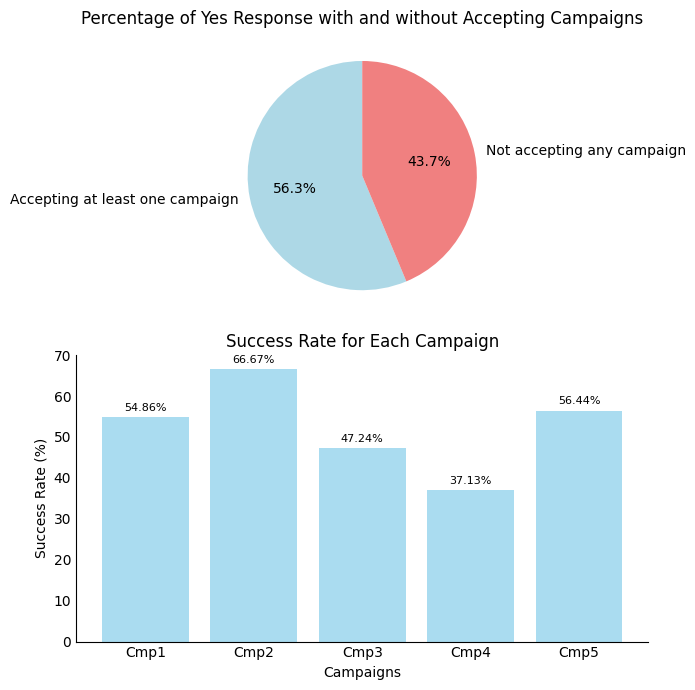

In [225]:
# subplots
fig, axes = plt.subplots(2, 1, figsize=(7, 7))
ax = axes.ravel()

# pie chart
colors = ['lightblue', 'lightcoral']
labels = ['Accepting at least one campaign', 'Not accepting any campaign']
sizes = [percentage_at_least_one_campaign_response,
         percentage_no_campaign_response]
ax[0].pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax[0].set_title('Percentage of Yes Response with and without Accepting Campaigns')

# bar chart for Success Rate
ax[1].bar(df_marketing.index[:-2], df_marketing['Success Rate'][:-2], color='skyblue', alpha=0.7, label='Success Rate')
ax[1].set_xlabel('Campaigns')
ax[1].set_ylabel('Success Rate (%)')
ax[1].set_title('Success Rate for Each Campaign')

# Menghilangkan garis x dan y
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(True)
ax[1].spines['left'].set_visible(True)

ax[1].tick_params(axis='both', which='both', length=0)  # Menghilangkan tanda tick pada x dan y

# values pada bar chart
for i, v in enumerate(df_marketing['Success Rate'][:-2]):
    ax[1].text(i, v + 1, str(v) + '%', ha='center', va='bottom', fontsize=8)

plt.tight_layout(h_pad=1)
plt.show()

In [226]:
# membuat function untuk menampilkan plot pada agregasi data
def plot_grouped(data, group_column, variables, nrows=1, ncols=1, method='mean', hue=None):
    """
    Plot the average of specified variables grouped by the specified column.

    Parameters:
    - data: Pandas DataFrame containing the data.
    - group_column: Column to be used for grouping.
    - variables: List of variables to plot.
    - nrows: Number of rows in the subplot grid.
    - ncols: Number of columns in the subplot grid.
    - method: Method to aggregate the data ('mean', 'sum', 'count').
    - hue: Variable to differentiate the data further (categorical variable).

    Returns:
    - None (displays the plot).
    """

    # melakukan filter pada feature yang bertipe data numerik
    numeric_variables = [
        var for var in variables if pd.api.types.is_numeric_dtype(data[var])]

    # agregasi data berdasarkan hasil feature yang telah terfilter sebelumnya
    grouped_data = data.groupby([group_column, hue]).agg(
        {variable: method for variable in numeric_variables}).reset_index()

    # setup color palette
    palette = sns.color_palette('Set1', len(numeric_variables))

    # setup subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(10 * ncols, 5 * nrows))

    # untuk memastikan bahwa axes tetap iterable untuk kasus 1 subplot
    if nrows == 1 and ncols == 1:
        axes = [axes]

    # agregasi sesuai dengan methode yang terdefinisi pada parameter
    if method == 'mean':
        title = 'Average'
    elif method == 'sum':
        title = 'Total'
    elif method == 'count':
        title = 'Count'

    # melakukan perulangan pada setiap feature yang ditampilkan
    for i, variable in enumerate(numeric_variables):

        # menentukan posisi axes setiap feature
        row_index = i // ncols
        col_index = i % ncols
        ax = sns.barplot(x=group_column, y=variable, hue=hue,
                         data=grouped_data, ax=axes[row_index][col_index], palette=palette)

        # menentukan title, xlabel, ylabel, dan xticks
        axes[row_index][col_index].set_title(
            f'{title} {variable} by {group_column}')
        axes[row_index][col_index].set_ylabel(variable)
        axes[row_index][col_index].set_xlabel(group_column)
        axes[row_index][col_index].tick_params(axis='x', rotation=0)

        # menambahkan label angka di atas setiap bar
        for p in ax.patches:
            height = p.get_height()
            axes[row_index][col_index].text(p.get_x() + p.get_width()/2., height,
                                            f'{height:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    plt.tight_layout()
    plt.show()

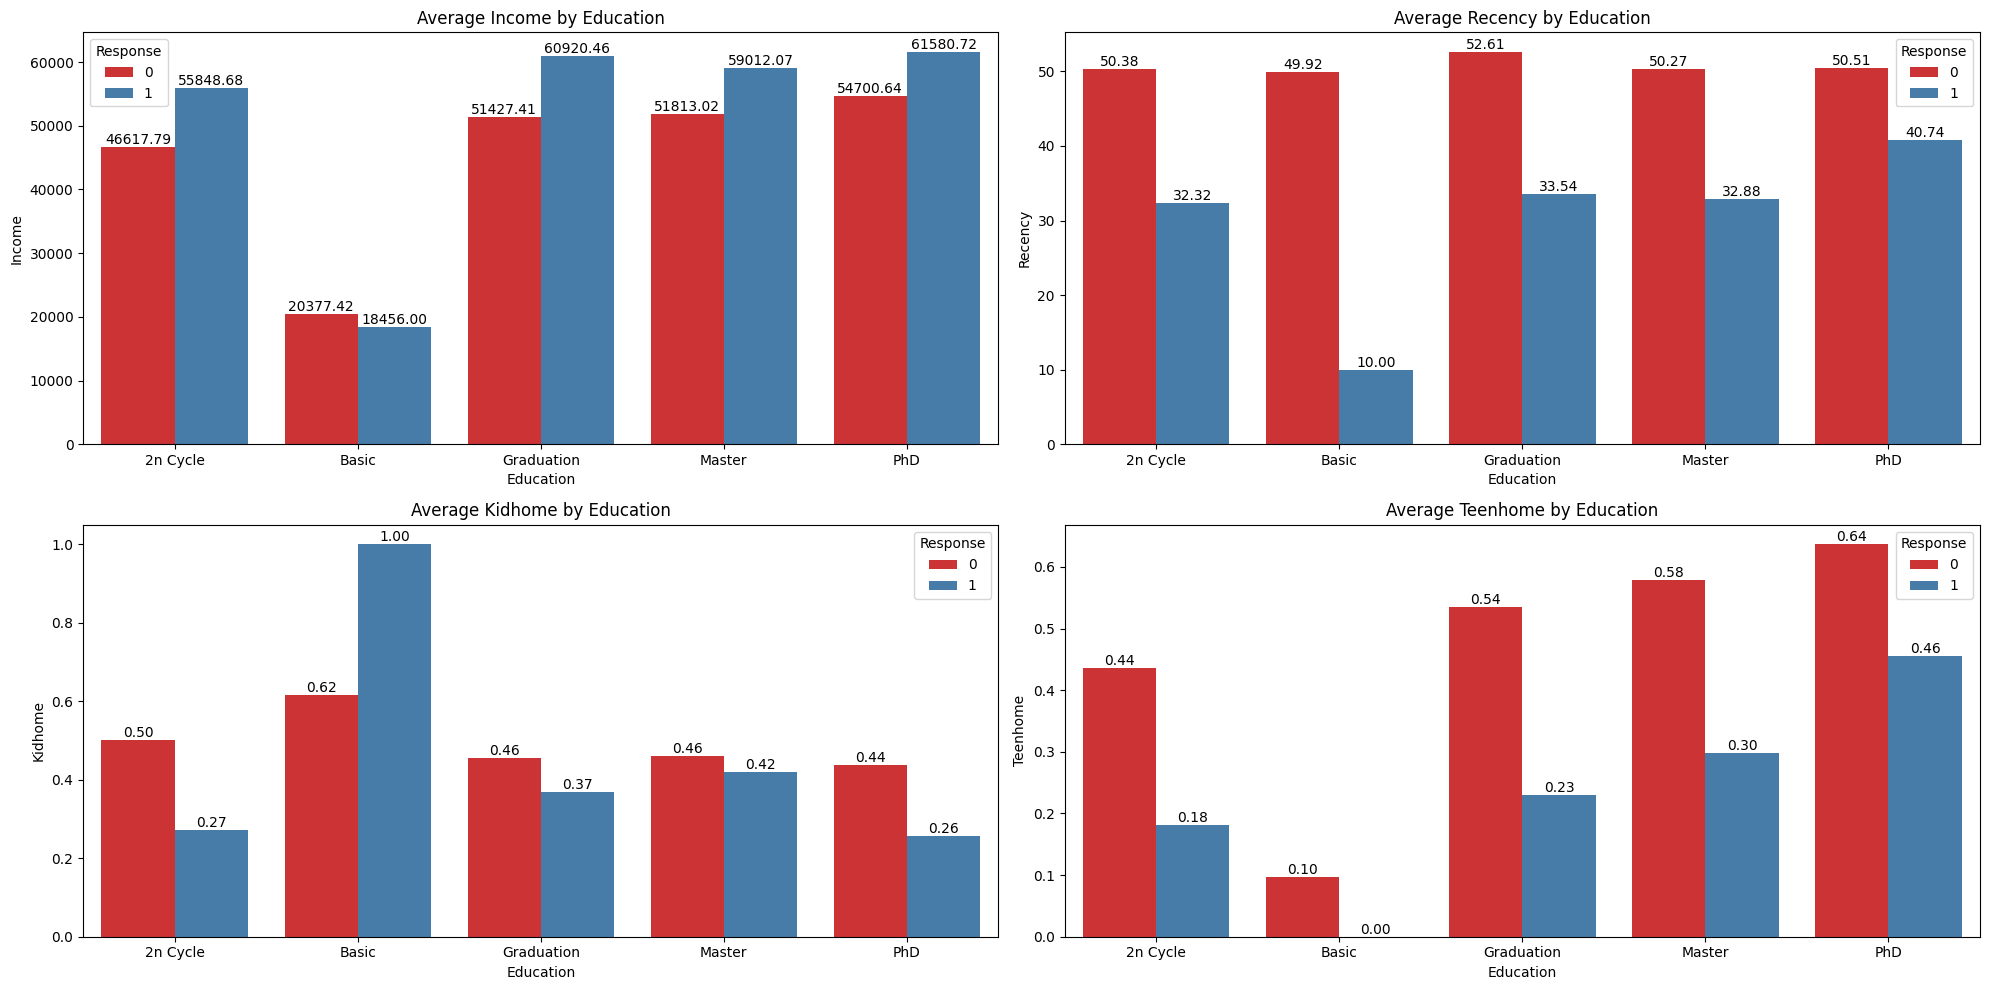

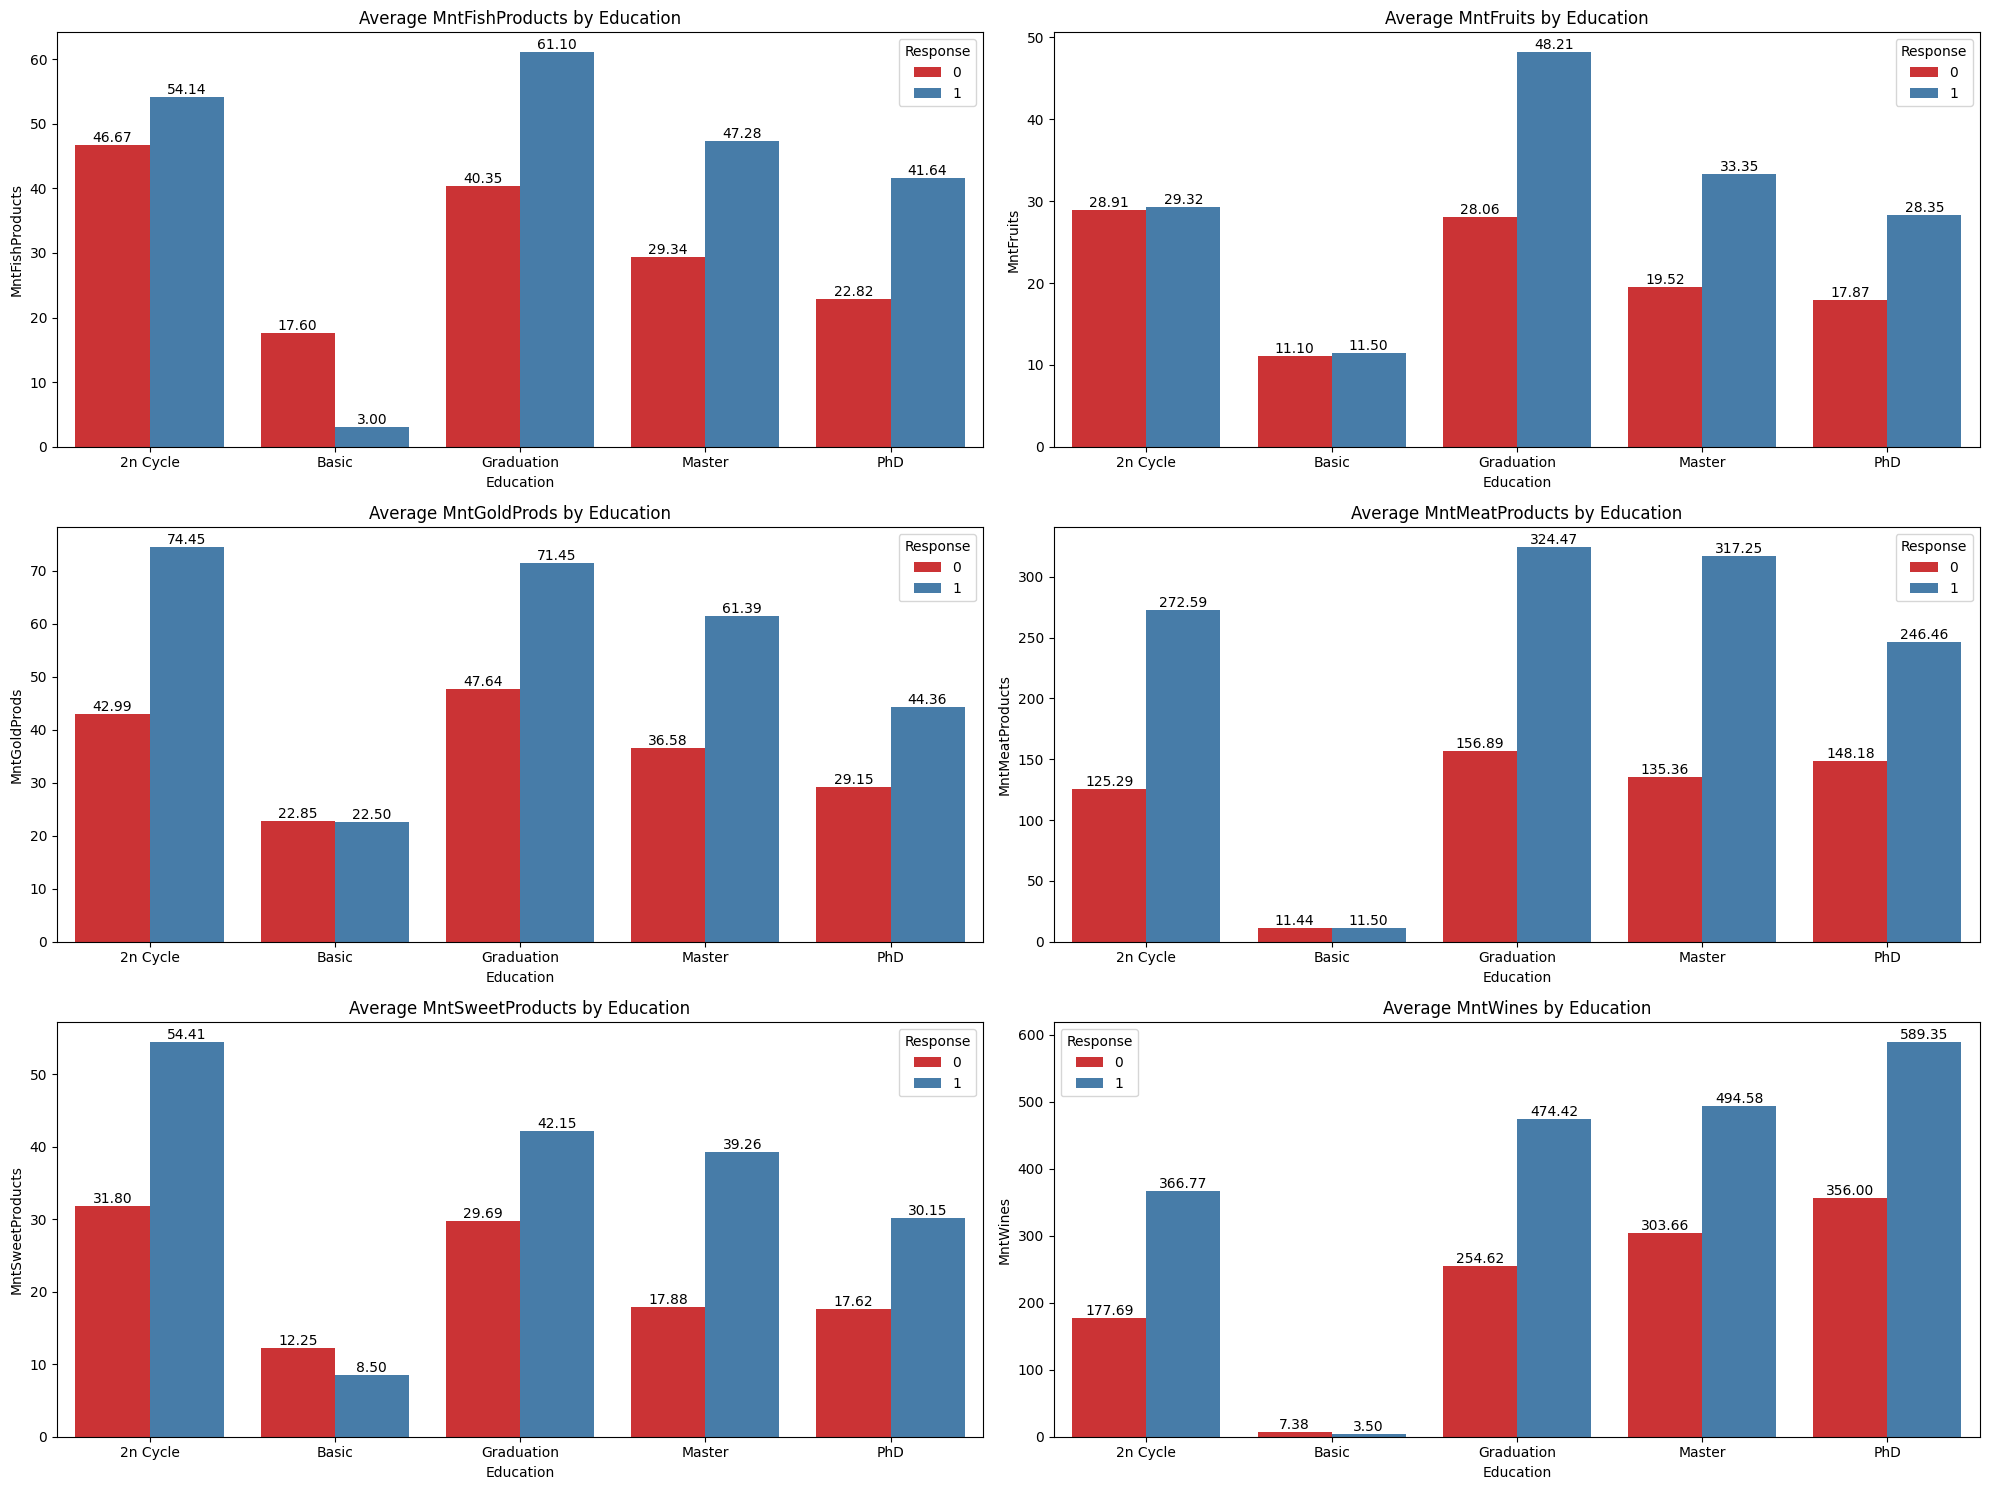

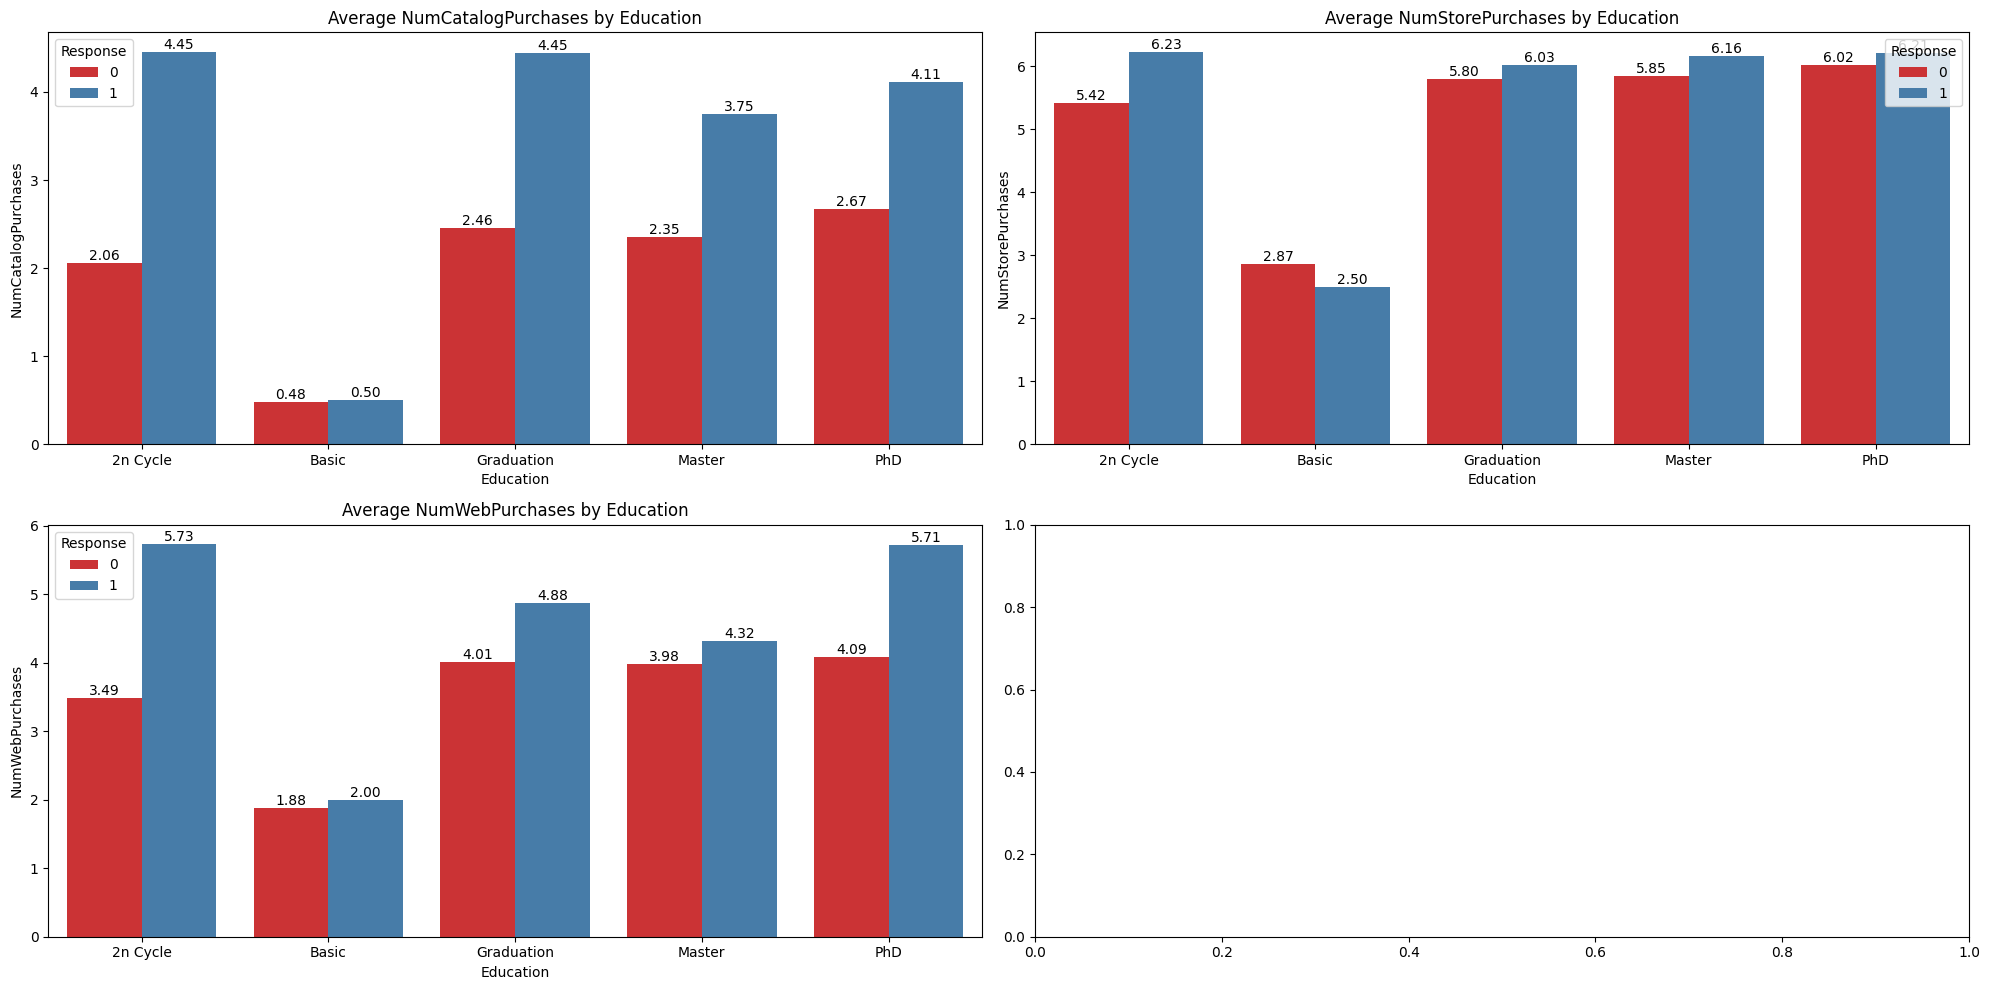

In [227]:
# memanggil function untuk menampilkan barplot pada agregasi feature education
plot_grouped(data, 'Education', ['Income','Recency','Kidhome','Teenhome'],
             nrows=2, ncols=2, hue='Response')

plot_grouped(data, 'Education', spending_cols,
             nrows=3, ncols=2, method='mean', hue='Response')

plot_grouped(data, 'Education', ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases'],
             nrows=2, ncols=2, method='mean', hue='Response')

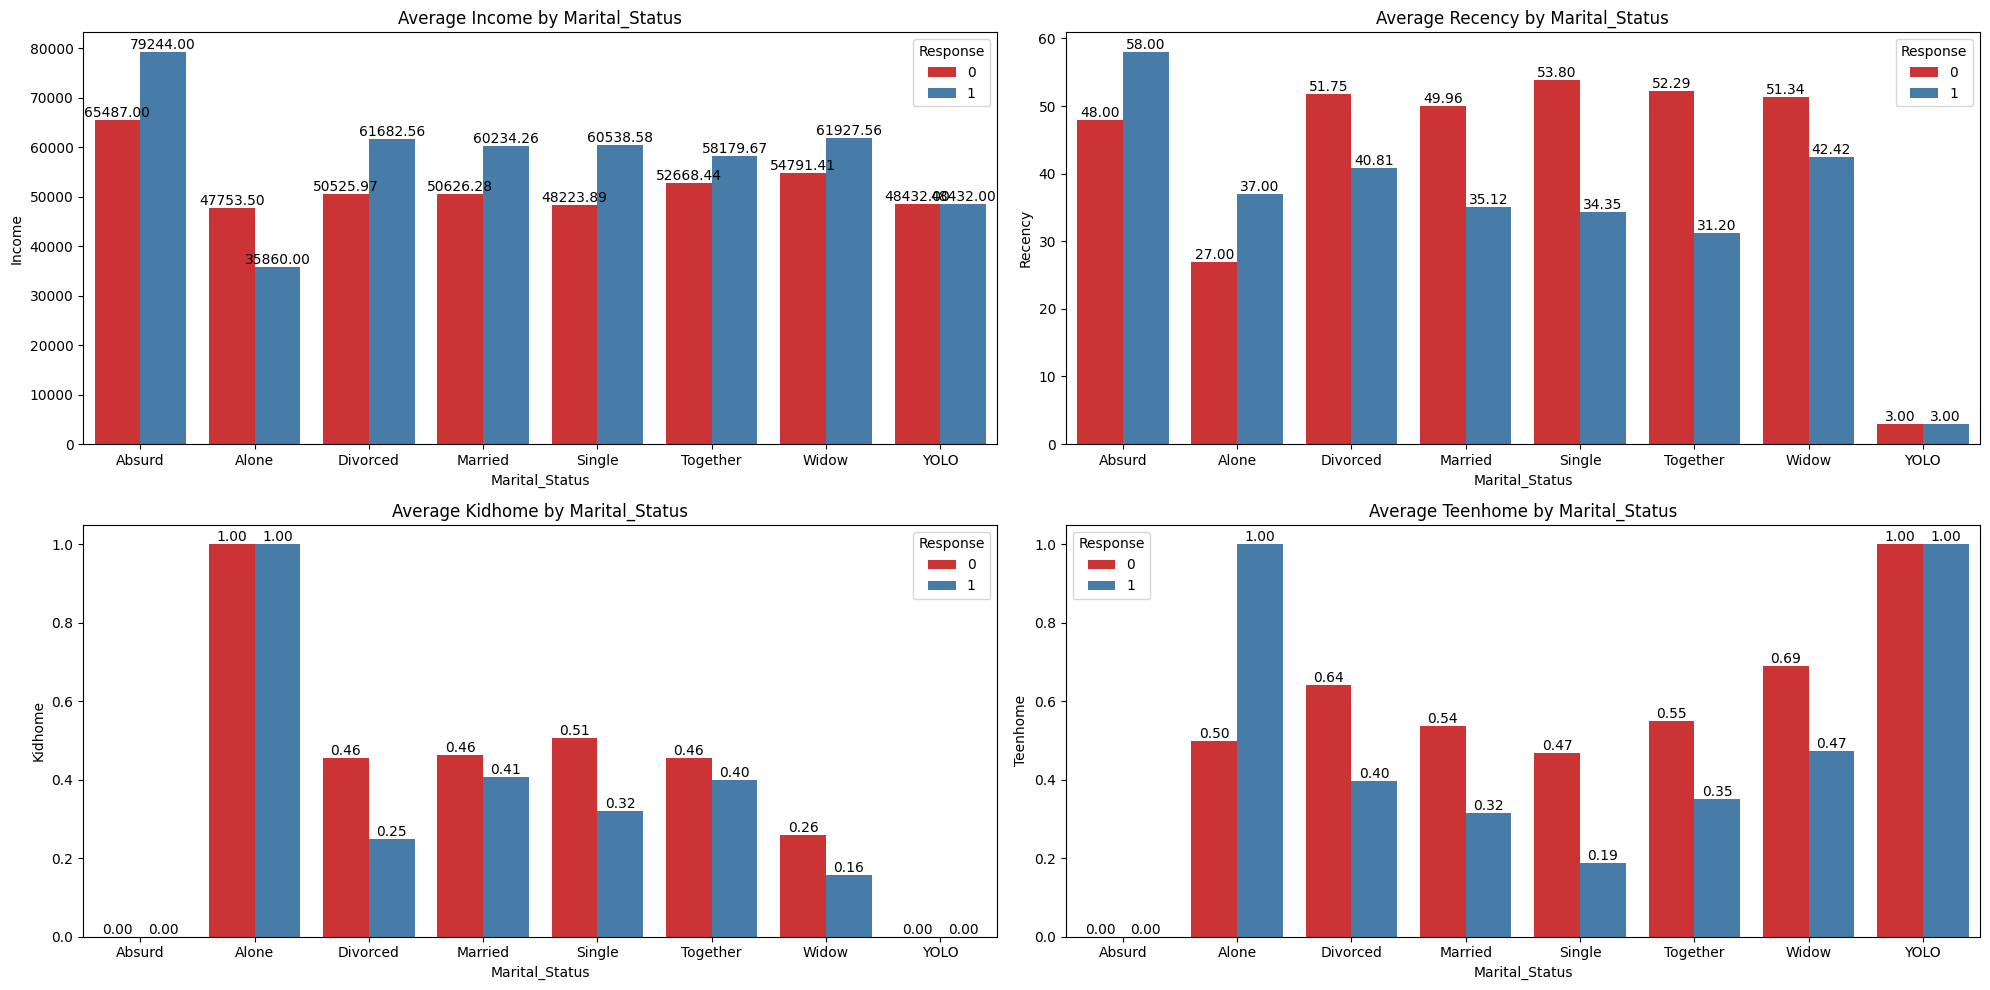

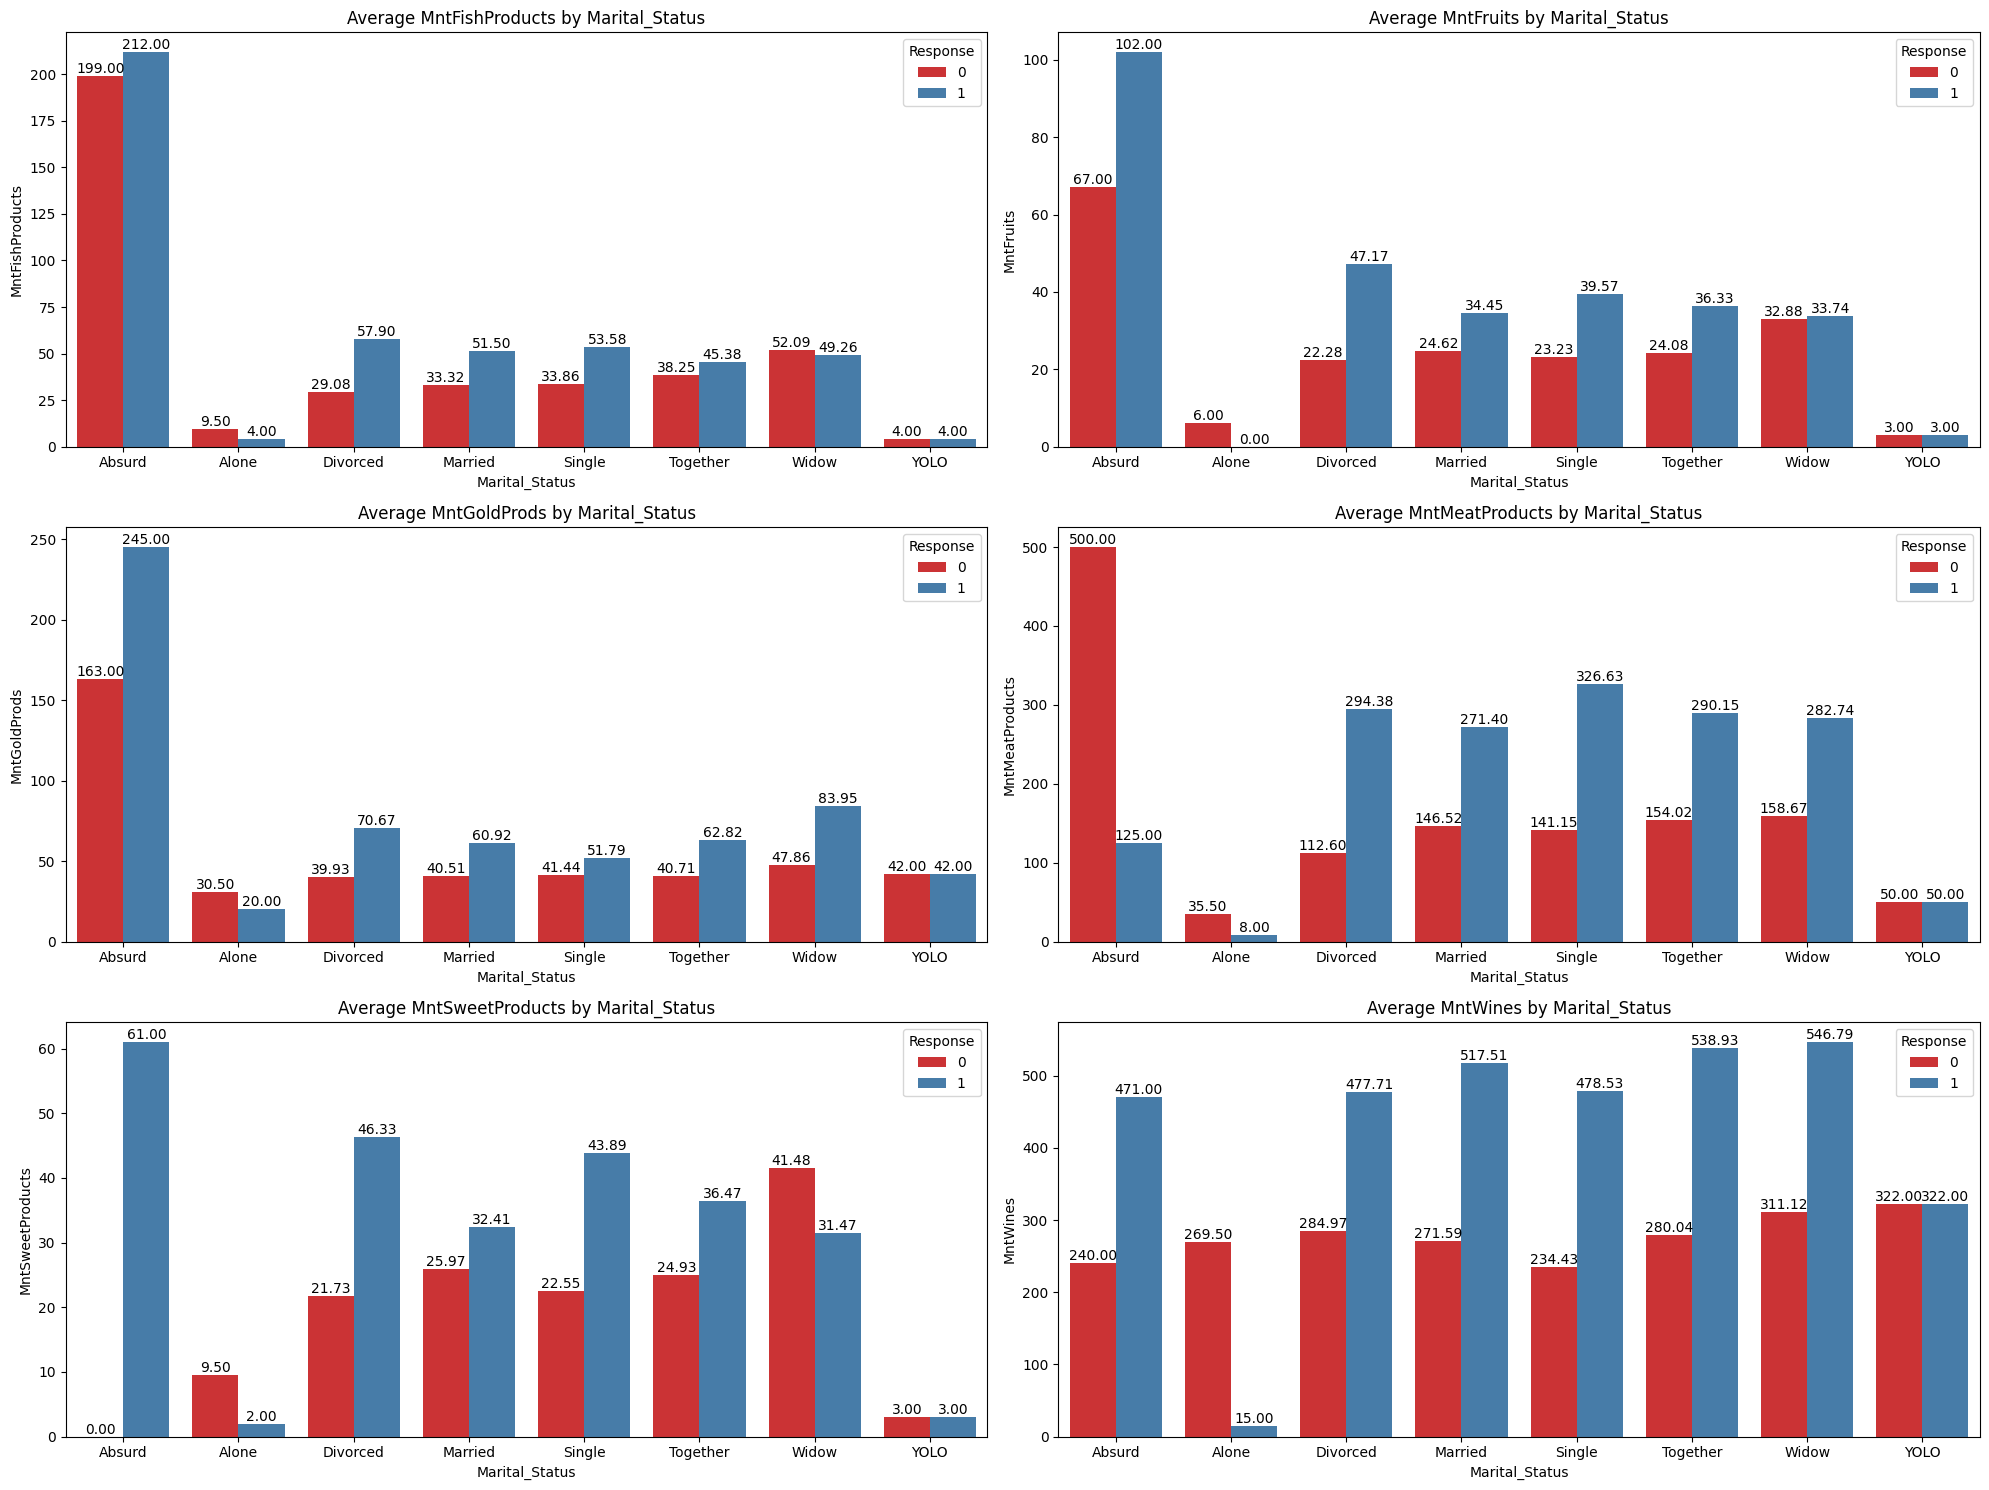

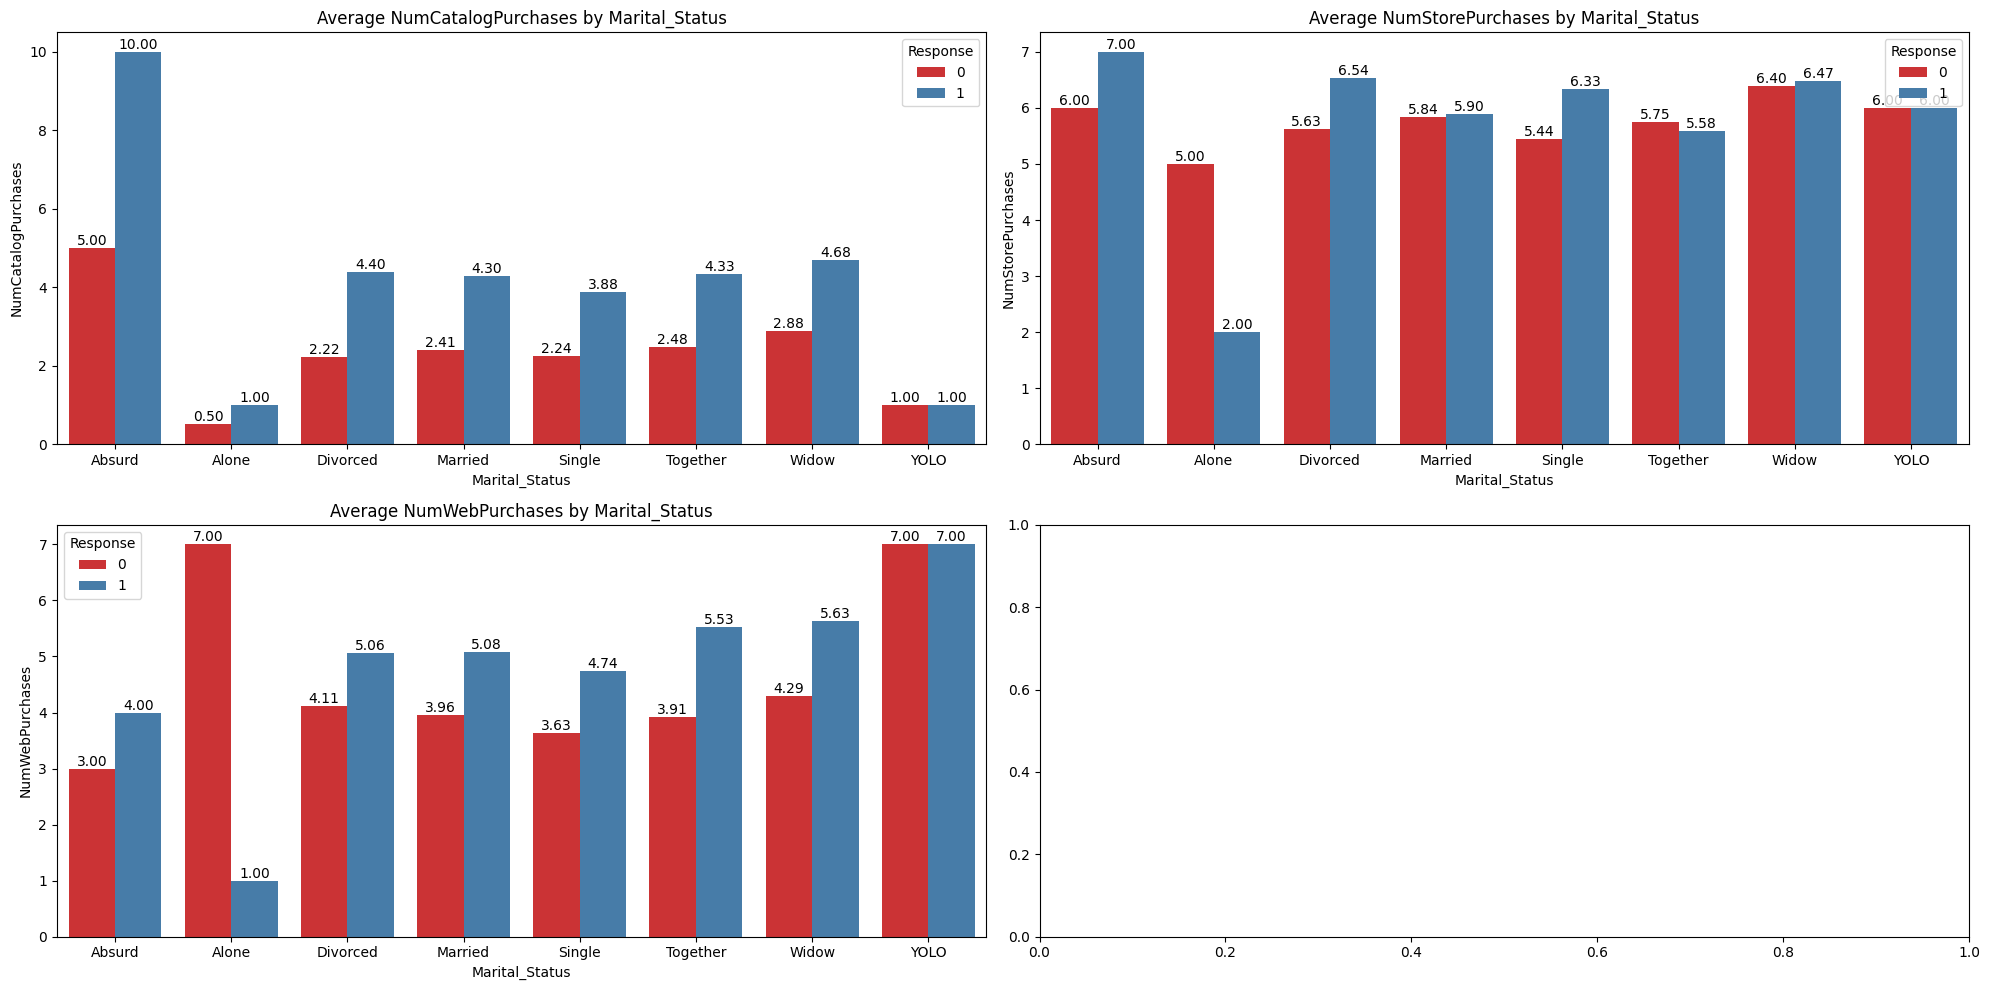

In [228]:
# memanggil function untuk menampilkan barplot pada agregasi marital status
plot_grouped(data, 'Marital_Status', ['Income','Recency','Kidhome','Teenhome'],
             nrows=2, ncols=2, hue='Response')

plot_grouped(data, 'Marital_Status', spending_cols,
             nrows=3, ncols=2, method='mean', hue='Response')

plot_grouped(data, 'Marital_Status', ['NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases'],
             nrows=2, ncols=2, method='mean', hue='Response')

#### **Summary Business Insights**

Berdasarkan analisis mendalam terhadap data campaign dan karakteristik pelanggan, kami menyarankan beberapa langkah strategis untuk meningkatkan efektivitas campaign dan memaksimalkan keuntungan bisnis:

1. Segmentasi Pelanggan Berdasarkan Respons campaign:

   Melakukan segmentasi pelanggan berdasarkan respons campaign dapat membantu dalam menyesuaikan strategi pemasaran. Fokuskan upaya pada kelompok pelanggan yang telah menunjukkan respons positif, seperti tingkat pendidikan Graduation, PhD, dan Master, serta status pernikahan Single, Married, dan Divorced.
2. Personalisasi Pesan dan Penawaran:

   Personalisasi pesan dan penawaran campaign untuk setiap kelompok pelanggan yang telah diidentifikasi dapat meningkatkan keterlibatan. Berdasarkan karakteristik unik dari setiap kelompok, buatlah pesan yang relevan dan tawarkan insentif yang sesuai dengan preferensi mereka.
3. Penargetan Tingkat Pendidikan Tinggi:

   Tingkat pendidikan tinggi seperti Graduation, PhD, dan Master memiliki potensi besar untuk respons campaign. Fokuskan penawaran khusus, informasi produk, dan keuntungan tambahan pada kelompok ini untuk memaksimalkan partisipasi.
4. Optimalkan Pengeluaran Pelanggan yang Merespon:

   Pelanggan yang merespons campaign memiliki kecenderungan pengeluaran yang lebih tinggi pada berbagai kategori produk. Optimalisasi persediaan dan promosi pada produk-produk yang paling diminati oleh kelompok pelanggan ini dapat meningkatkan nilai transaksi.
5. Perkuat campaign dengan Data Pembelian dan Channel:

   Analisis menunjukkan bahwa pelanggan yang merespons campaign memiliki rata-rata pembelian yang lebih tinggi di berbagai saluran seperti catalog, web, dan toko fisik. Penguatan campaign dengan peningkatan ketersediaan produk melalui saluran ini dapat meningkatkan aksesibilitas produk bagi pelanggan.
6. Pemantauan Terus-Menerus dan Analisis Reaksi Pelanggan:

   Melakukan pemantauan terus-menerus terhadap respons pelanggan dan melakukan analisis lebih lanjut terhadap perubahan tren dan preferensi. Keterlibatan yang berkelanjutan dan penyesuaian cepat terhadap dinamika pasar dapat menjadi kunci kesuksesan jangka panjang.

Dengan menerapkan strategi ini, diharapkan perusahaan dapat meraih keberhasilan yang lebih besar dalam campaign pemasaran, meningkatkan loyalitas pelanggan, dan mengoptimalkan hasil bisnis secara keseluruhan.

# **4. Data Pre-Processing** <a id=4></a>
[back to top](#100)

## **4.0 Data Split** <a id=4.0></a>

In [229]:
# melakukan backup dataset sebelum split
data_before_splitting = data.copy()

In [230]:
# restore point
data = data_before_splitting.copy()
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [231]:
# split train and test set

# memisahkan antara training dan test set
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

# menampilkan shape dari train dan test set
print(f'data_train: {data_train.shape}, data_test: {data_test.shape}')

data_train: (1792, 26), data_test: (448, 26)


## **4.1 Handling Missing Values** <a id=4.1></a>

In [232]:
# backup dataset sebelum handling missing values
data_before_handling_missingvalues_train = data_train.copy()
data_before_handling_missingvalues_test = data_test.copy()

In [233]:
# restore point data_train
data_train = data_before_handling_missingvalues_train.copy()
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [234]:
# restore point data_test
data_test = data_before_handling_missingvalues_test.copy()
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   
3        1984  Graduation       Together  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2012-09-04       58       635         88  ...                   10   
1  2014-03-08       38        11          1  ...                    1   
2  2013-08-21       26       426         49  ...                    2   
3  2014-02-10       26        11          4  ...                    0   
4  2014-01-19       94       173         43  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[5 rows x 26 columns]

In [235]:
# membuat function untuk mengidentifikasi missing values
def identify_missing_values(data):

    # menghitung missing values pada setiap feature
    missing_values_count = data.isnull().sum().reset_index().rename(
        {'index': 'column', 0: 'missing values'}, axis=1)

    # filter feature yang mempunyai missing values
    missing_values_count = missing_values_count[missing_values_count['missing values'] > 0]

    # menghitng persentase missing values
    missing_values_count['percentage'] = round(
        (missing_values_count['missing values'] / len(data) * 100), 2)

    # mengurutkan jumlah missing values secara descending
    missing_values_count = missing_values_count.sort_values(
        by='missing values', ascending=False).reset_index(drop=True)

    return missing_values_count

In [236]:
# menampilkan data shape dan memanggil function untuk mengidentifikasi missing values
print(f'Data Train Shape : {data_train.shape}')
print(f'Data Test Shape : {data_test.shape}')
print(identify_missing_values(data_train))
print(identify_missing_values(data_test))

Data Train Shape : (1792, 26)
Data Test Shape : (448, 26)
   column  missing values  percentage
0  Income              19        1.06
   column  missing values  percentage
0  Income               5        1.12


In [237]:
# handling missing values, dengan menghapusnya (<1%)
data_train.dropna(axis=0, inplace=True)
data_test.dropna(axis=0, inplace=True)
print(data_train.shape)
print(data_test.shape)

(1773, 26)
(443, 26)


## **4.2 Handling Duplicates Values** <a id=4.2></a>

In [238]:
# melakukan backup dataset sebelum handling duplicates
data_before_handling_duplicates_train = data_train.copy()
data_before_handling_duplicates_test = data_test.copy()

In [239]:
# restore point
data_train = data_before_handling_duplicates_train.copy()
data_test = data_before_handling_duplicates_test.copy()

In [240]:
# membuat function untuk mengidentifikasi data terduplikasi
def identify_duplicates(df):
    """
    Identify duplicated rows in a DataFrame and return a summary.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: A DataFrame containing information about duplicated rows.
    """
    # mencari baris yang terduplikasi
    duplicate_rows = df[df.duplicated()]

    # menghitng jumlah row yang terduplikasi
    duplicate_count = len(duplicate_rows)

    # membuat dataframe untuk menampilkan jumlah row beserta persentase data yang terduplikasi
    if duplicate_count > 0:
        duplicate_info = pd.DataFrame({
            'duplicated rows': [duplicate_count],
            'percentage': round((duplicate_count / len(df) * 100), 2)
        })
    else:
        duplicate_info = pd.DataFrame({
            'duplicated rows': [0],
            'percentage': [0.0]
        })

    return duplicate_info

In [241]:
# menampikan data shape dan memanggil function untuk mengidentikasi data yang terduplikasi
print(f'Data Train Shape : {data_train.shape}')
print(f'Data Test Shape : {data_test.shape}')
print(identify_duplicates(data_train))
print(identify_duplicates(data_test))

Data Train Shape : (1773, 26)
Data Test Shape : (443, 26)
   duplicated rows  percentage
0              116        6.54
   duplicated rows  percentage
0                6        1.35


In [242]:
# menampilkan baris data yang terduplikasi pada data_train
data_train[data_train.duplicated(keep=False)].sort_values(by=['Education','Marital_Status','Income'])

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
1107        1970  2n Cycle        Married  15315.0        0         0   
558         1970  2n Cycle        Married  15315.0        0         0   
1549        1975  2n Cycle        Married  37284.0        1         1   
2015        1975  2n Cycle        Married  37284.0        1         1   
669         1971  2n Cycle        Married  54690.0        1         1   
...          ...       ...            ...      ...      ...       ...   
2062        1982       PhD       Together  70038.0        0         0   
1630        1947       PhD       Together  73059.0        0         1   
658         1947       PhD       Together  73059.0        0         1   
1649        1950       PhD          Widow  56551.0        1         1   
1959        1950       PhD          Widow  56551.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
1107  2013-08-03       27         7          4  ...                    0   
558   2013-08-03       27         7          4  ...                    0   
1549  2013-03-29       46        11          1  ...                    0   
2015  2013-03-29       46        11          1  ...                    0   
669   2013-11-07       76       111         16  ...                    1   
...          ...      ...       ...        ...  ...                  ...   
2062  2013-10-25       54       587         54  ...                    4   
1630  2013-08-31       36       410        112  ...                    3   
658   2013-08-31       36       410        112  ...                    3   
1649  2014-05-07       48        67          4  ...                    1   
1959  2014-05-07       48        67          4  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
1107                  4                  5             0             0   
558                   4                  5             0             0   
1549                  3                  6             0             0   
2015                  3                  6             0             0   
669                   5                  3             0             0   
...                 ...                ...           ...           ...   
2062                  8                  2             0             0   
1630                 13                  4             0             0   
658                  13                  4             0             0   
1649                  4                  4             0             0   
1959                  4                  4             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
1107             0             0             0         0         0  
558              0             0             0         0         0  
1549             0             0             0         0         0  
2015             0             0             0         0         0  
669              0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2062             0             0             0         0         0  
1630             0             0             0         0         0  
658              0             0             0         0         0  
1649             0             0             0         0         0  
1959             0             0             0         0         0  

[226 rows x 26 columns]

In [243]:
# menampilkan baris data yang terduplikasi pada data_test
data_test[data_test.duplicated(keep=False)].sort_values(by=['Education','Marital_Status','Income'])

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
508         1992  Graduation        Married  34935.0        0         0   
1578        1992  Graduation        Married  34935.0        0         0   
1318        1972  Graduation        Married  40321.0        1         1   
316         1972  Graduation        Married  40321.0        1         1   
705         1986  Graduation        Married  71952.0        1         0   
351         1986  Graduation        Married  71952.0        1         0   
1822        1971      Master         Single  33316.0        1         1   
1359        1971      Master         Single  33316.0        1         1   
1545        1986      Master       Together  42386.0        1         0   
297         1986      Master       Together  42386.0        1         0   
1347        1983         PhD        Married  50150.0        0         0   
99          1983         PhD        Married  50150.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
508   2013-06-21       71        34          4  ...                    1   
1578  2013-06-21       71        34          4  ...                    1   
1318  2013-07-29       59        44          4  ...                    0   
316   2013-07-29       59        44          4  ...                    0   
705   2013-01-10       93       656         80  ...                    4   
351   2013-01-10       93       656         80  ...                    4   
1822  2013-10-04       34        79          1  ...                    1   
1359  2013-10-04       34        79          1  ...                    1   
1545  2013-01-13       43        65          4  ...                    0   
297   2013-01-13       43        65          4  ...                    0   
1347  2013-06-20       32       135         46  ...                    2   
99    2013-06-20       32       135         46  ...                    2   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
508                   4                  7             0             0   
1578                  4                  7             0             0   
1318                  3                  7             0             0   
316                   3                  7             0             0   
705                   8                  4             1             0   
351                   8                  4             1             0   
1822                  4                  6             0             0   
1359                  4                  6             0             0   
1545                  3                  8             0             0   
297                   3                  8             0             0   
1347                  7                  5             0             0   
99                    7                  5             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
508              0             0             0         0         0  
1578             0             0             0         0         0  
1318             0             0             0         0         0  
316              0             0             0         0         0  
705              1             0             0         0         0  
351              1             0             0         0         0  
1822             0             0             0         0         0  
1359             0             0             0         0         0  
1545             0             0             0         0         0  
297              0             0             0         0         0  
1347             0             0             0         0         0  
99               0             0             0         0         0  

[12 rows x 26 columns]

In [244]:
# handling data yang terduplikasi dengan cara menghapusnya
data_train.drop_duplicates(keep='first', inplace=True)
data_test.drop_duplicates(keep='first', inplace=True)
print(f'Data Train Shape : {data_train.shape}')
print(f'Data Test Shape : {data_test.shape}')

Data Train Shape : (1657, 26)
Data Test Shape : (437, 26)


## **4.3 Handling Outliers** <a id=4.3></a>

In [245]:
# melakukan backup dataset sebelum handling outliers
data_before_handling_outliers_train = data_train.copy()
data_before_handling_outliers_test = data_test.copy()

In [246]:
# restore point
data_train = data_before_handling_outliers_train.copy()
data_test = data_before_handling_outliers_test.copy()

In [247]:
# z-score outliers handling
from scipy.stats import zscore
def handle_outliers_zscore(data, columns, threshold=3, plot=False):
    filtered_entries = np.array([True] * len(data))
    outliers_entries = np.array([True] * len(data))

    for column in columns:
        z_scores = np.abs(zscore(data[column]))
        filtered = (z_scores < threshold)
        filtered_entries = np.logical_and(filtered, filtered_entries)
        outliers_entries = ~filtered_entries
        filtered_data = data[filtered_entries]
        outliers_data = data[outliers_entries]

    filtered_data.reset_index(drop=True, inplace=True)
    outliers_data.reset_index(drop=True, inplace=True)

    if plot:
        for column in columns:
            fig, ax = plt.subplots(1, 2, figsize=(8, 4))
            ax[0].set_title(f'Before Outliers in {column}')
            sns.boxplot(data[column], ax=ax[0])
            ax[1].set_title(f'After Outliers in {column}')
            sns.boxplot(filtered_data[column], ax=ax[1])
            plt.tight_layout()
            plt.show()

    data_size = data.shape[0]
    filtered_size = filtered_data.shape[0]
    outliers_size = outliers_data.shape[0]
    pct_outliers = round((outliers_size / data_size) * 100, 2)

    result = pd.Series(data=[data_size, filtered_size, outliers_size, pct_outliers],
                       index=['Before', 'After', 'Outliers', '% Outliers'])
    print(result, '\n')

    return filtered_data, outliers_data

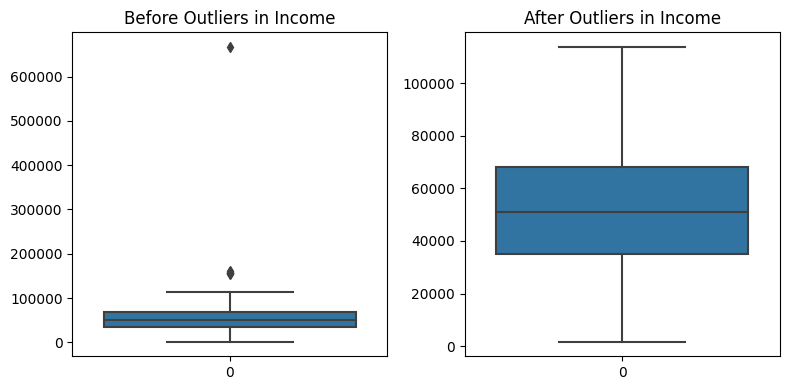

Before        1657.00
After         1650.00
Outliers         7.00
% Outliers       0.42
dtype: float64 



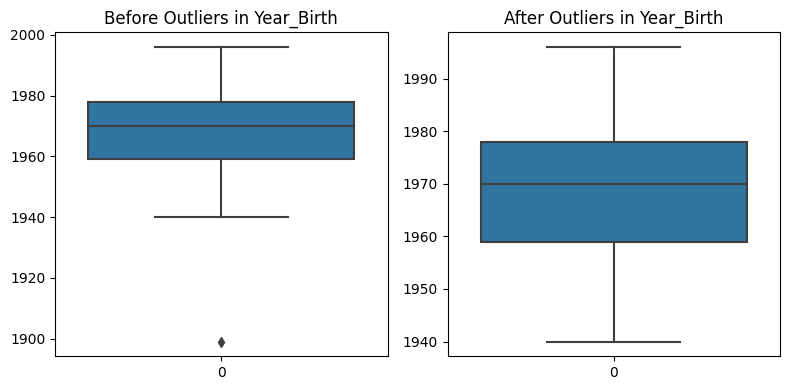

Before        1650.00
After         1649.00
Outliers         1.00
% Outliers       0.06
dtype: float64 



In [248]:
# menghapus outlier pada feature income data_train
outlier_cols = ['Income']
data_train, residu_income_train = handle_outliers_zscore(data_train, outlier_cols, 3, True)

# menghapus outlier pada feature Year_Birth data_train
outlier_cols = ['Year_Birth']
data_train, residu_yearbirth_train = handle_outliers_zscore(data_train, outlier_cols, 3, True)

In [249]:
residu_income_train.sort_values(by='Income', ascending=False)

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
0        1977  Graduation       Together  666666.0        1         0   
5        1982         PhD        Married  160803.0        0         0   
6        1971      Master       Together  157733.0        1         0   
1        1973         PhD        Married  157243.0        0         1   
2        1977  Graduation       Together  157146.0        0         0   
3        1949         PhD        Married  156924.0        0         0   
4        1975  Graduation       Divorced  153924.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2013-06-02       23         9         14  ...                    1   
5  2012-08-04       21        55         16  ...                   28   
6  2013-06-04       37        39          1  ...                    0   
1  2014-03-01       98        20          2  ...                   22   
2  2013-04-29       13         1          0  ...                   28   
3  2013-08-29       85         2          1  ...                    0   
4  2014-02-07       81         1          1  ...                    0   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  3                  6             0             0   
5                  1                  0             0             0   
6                  1                  1             0             0   
1                  0                  0             0             0   
2                  0                  1             0             0   
3                  0                  0             0             0   
4                  0                  0             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         0  
5             0             0             0         0         0  
6             0             0             0         0         0  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0  

[7 rows x 26 columns]

In [250]:
residu_yearbirth_train.sort_values(by='Year_Birth', ascending=False)

Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
0        1899       PhD       Together  83532.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0  2013-09-26       36       755        144  ...                    6   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  1             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             1             0             0         0         0  

[1 rows x 26 columns]

## **4.4 Feature Extraction** <a id=4.4></a>

In [251]:
# backup dataset sebelum melakukan feature extraction
data_before_extraction_train = data_train.copy()
data_before_extraction_test = data_test.copy()
data_before_extraction = data.copy()

In [252]:
# restore point
data_train = data_before_extraction_train.copy()
data_test = data_before_extraction_test.copy()
data = data_before_extraction.copy()

In [253]:
data_train['feature'] = 'train'
data_test['feature'] = 'test'
data = pd.concat([data_train,data_test]).reset_index(drop=True)

In [254]:
# membuat feature baru berdasarkan status hubungan
marital = {
    'Single': 'Not in relationship',
    'Together': 'In relationship',
    'Married': 'In relationship',
    'Divorced': 'Not in relationship',
    'Widow': 'Not in relationship',
    'Alone': 'Not in relationship',
    'Absurd': 'Not in relationship',
    'YOLO': 'Not in relationship'
}
data['Relationship_Status'] = data['Marital_Status'].map(marital)

# membuat feature baru total_children dari penjumlahan feature kidhome dan teenhome
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

# membuat feature baru berdasarkan jumlah anggota keluarga
def fam_size(x):
    if x['Relationship_Status'] == 'Not in relationship':
        result = 1 + x['Teenhome'] + x['Kidhome']
    elif x['Relationship_Status'] == 'In relationship':
        result = 2 + x['Teenhome'] + x['Kidhome']
    return result
data['Family_Size'] = data.apply(fam_size, axis=1)

# membuat feature baru berdasarkan tanggal bergabung dan diasumsikan data dikumpulkan pada awal juli 2014
data['Customer_Lifespan'] = (pd.to_datetime('2014-07-01') - data['Dt_Customer']).dt.days

# ekstraksi feature Datetime menjadi feature baru
data['Year'] = data['Dt_Customer'].dt.year
data.drop(['Dt_Customer'],axis=1,inplace=True)

# membuat feature baru total purchase, total spending, dan total offers
data['Total_Purchase'] = data.apply(lambda x: x[purchase_cols[:-1]].sum(), axis=1)
data['Total_Spending'] = data.apply(lambda x: x[spending_cols].sum(), axis=1)
data['Total_Offers'] = data.apply(lambda x: x[campaign_cols[:-1]].sum(), axis=1)

# membuat feature baru untuk menghitung ratio spending dengan total pembelian, dan ratio pembelian diskon dengan total pembelian
data['Spending_Purchase_Ratio'] = data['Total_Spending']/data['Total_Purchase']
data['Deal_Purchase_Ratio'] = data['NumDealsPurchases']/data['Total_Purchase']

# membuat feature baru accept one campaign and more than one campaign
data['at_least_one_campaign'] = data.apply(lambda x: 1 if x[campaign_cols[:-1]].sum() == 1 else 0, axis=1)
data['more_one_campaign'] = data.apply(lambda x: 1 if x[campaign_cols[:-1]].sum() > 1 else 0, axis=1)

# membuat feature baru untuk primary_needs
def categorize_needs(row):
    primary_needs = row['MntFruits'] + row['MntMeatProducts'] + row['MntFishProducts']
    secondary_needs = row['MntWines'] + row['MntGoldProds'] + row['MntSweetProducts']

    if primary_needs > secondary_needs:
        return 'primary_needs'
    else:
        return 'secondary_needs'

data['primary_needs'] = data.apply(categorize_needs, axis=1)

# mengubah value pada feature education
data['Education'].replace({'Basic':'Graduation','2n Cycle':'Master'}, inplace=True)

# mengubah value pada feature marital_status
data['Marital_Status'].replace({'YOLO':'Single','Absurd':'Single','Alone':'Single',
                                'Widow':'Divorced','Together':'Married'}, inplace=True)

# identifikasi dan handling inf value dari 'Spending_Purchase_Ratio' dan 'Deal_Purchase_Ratio'
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1950  Graduation         Single  16813.0        0         0       49   
1        1963      Master         Single  64191.0        0         1       30   
2        1971         PhD        Married  71969.0        0         1       59   
3        1968         PhD        Married  29187.0        1         0       43   
4        1969  Graduation        Married   4428.0        0         1        0   

   MntWines  MntFruits  MntMeatProducts  ...  Customer_Lifespan  Year  \
0         4          8               11  ...                347  2013   
1       420         15              186  ...                525  2013   
2      1000          0               76  ...                623  2012   
3        26          0                6  ...                418  2013   
4        16          4               12  ...                269  2013   

   Total_Purchase  Total_Spending  Total_Offers  Spending_Purchase_Ratio  \
0               6              50             1                 8.333333   
1              24             825             0                34.375000   
2              19            1086             1                57.157895   
3               5              34             0                 6.800000   
4              25             359             0                14.360000   

   Deal_Purchase_Ratio  at_least_one_campaign  more_one_campaign  \
0             0.166667                      1                  0   
1             0.125000                      0                  0   
2             0.157895                      1                  0   
3             0.200000                      0                  0   
4             0.000000                      0                  0   

     primary_needs  
0    primary_needs  
1  secondary_needs  
2  secondary_needs  
3  secondary_needs  
4  secondary_needs  

[5 rows x 39 columns]

In [255]:
# rfm encode

'''
Champions: Pelanggan dengan RFM score tertinggi.
Loyal Customers: Pelanggan dengan frekuensi tinggi dan nilai monetary tinggi.
At-Risk Customers: Pelanggan dengan recency rendah dan frekuensi rendah.
New Customers: Pelanggan dengan recency tinggi dan frekuensi rendah.
'''

# membuat feature baru category rfm score (champions, loyal, at risk, new)
rfm = pd.DataFrame()
rfm['Recency'] = data['Recency']
rfm['Frequency'] = data['Total_Purchase']
rfm['Monetary'] = data['Total_Spending']
rfm.head()

Recency  Frequency  Monetary
0       49          6        50
1       30         24       825
2       59         19      1086
3       43          5        34
4        0         25       359

In [256]:
rfm.describe(percentiles=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6,
                           0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]).T

count        mean         std  min   10%   15%   20%   25%   30%  \
Recency    2084.0   49.040787   29.027769  0.0   9.0  13.0  19.0  24.0  29.0   
Frequency  2084.0   14.944338    7.584618  1.0   5.0   6.0   7.0   8.0   9.0   
Monetary   2084.0  610.854607  602.836658  8.0  35.0  45.0  55.6  69.0  92.0   

             35%  ...    55%    60%     65%    70%      75%     80%     85%  \
Recency     34.0  ...   54.0   58.8   64.00   70.0    74.00    79.0    84.0   
Frequency   10.0  ...   17.0   17.0   19.00   20.0    21.00    22.0    23.0   
Monetary   135.0  ...  496.0  641.0  794.95  928.1  1049.75  1178.4  1338.0   

              90%      95%     max  
Recency      89.0    94.00    99.0  
Frequency    25.0    27.00    43.0  
Monetary   1535.1  1781.55  2525.0  

[3 rows x 23 columns]

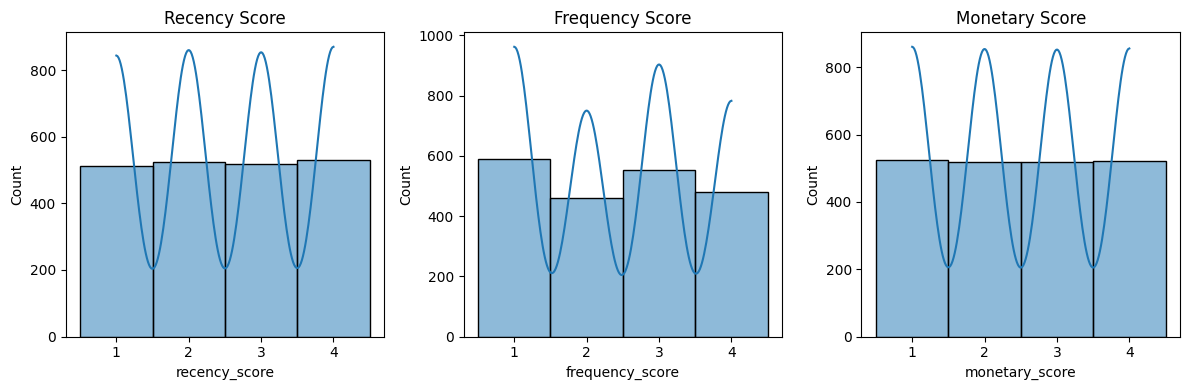

In [257]:
# kalkulasi score berdasarkan quantile masing-masing feature
rfm['recency_score'] = pd.qcut(rfm['Recency'], q=[0, 0.25, 0.5, 0.75, 1], labels=[4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])
rfm['monetary_score'] = pd.qcut(rfm['Monetary'], q=[0, 0.25, 0.5, 0.75, 1], labels=[1, 2, 3, 4])

# histplot rfm features
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(rfm['recency_score'], kde=True, ax=axes[0])
axes[0].set_title('Recency Score')

sns.histplot(rfm['frequency_score'], kde=True, ax=axes[1])
axes[1].set_title('Frequency Score')

sns.histplot(rfm['monetary_score'], kde=True, ax=axes[2])
axes[2].set_title('Monetary Score')

plt.tight_layout()
plt.show()

<Axes: xlabel='rfm_score', ylabel='Count'>

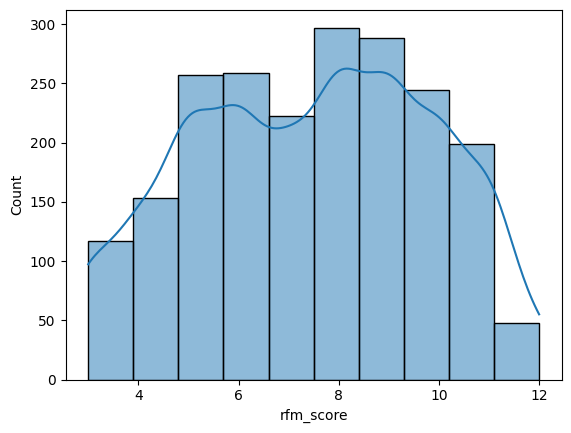

In [258]:
# histplot rfm score
rfm['rfm_score'] = rfm['recency_score'].astype('int') + rfm['frequency_score'].astype('int') + rfm['monetary_score'].astype('int')
sns.histplot(rfm['rfm_score'], kde=True, bins=10)

<Axes: xlabel='RFM_Cat', ylabel='count'>

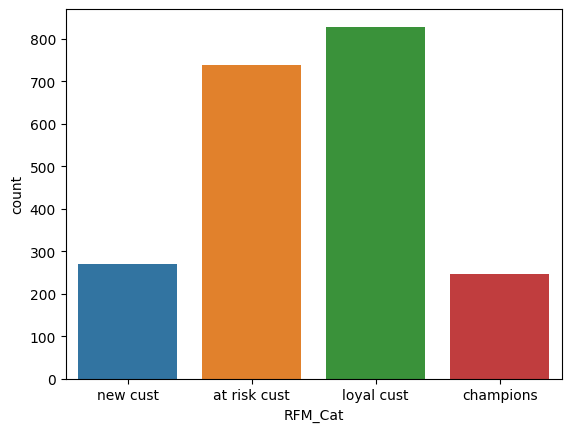

In [259]:
'''scoring rfm
0-4 new cust
5-7 at risk cust
8-10 loyal cust
10-12 champions

'''
rfm['RFM_Cat'] = pd.cut(rfm['rfm_score'], bins=[0,4,7,10,12], labels=['new cust','at risk cust','loyal cust','champions'])
sns.countplot(x=rfm['RFM_Cat'])

In [260]:
# concat dataframe data dengan rfm
data = pd.concat([data, rfm['RFM_Cat']], axis=1)

## **4.5 Feature Encoding** <a id=4.5></a>

In [261]:
# backup dataset sebelum melakukan feature enconding
data_before_encoding = data.copy()

In [262]:
# restore point
data = data_before_encoding.copy()

In [263]:
from sklearn.preprocessing import OrdinalEncoder
# encoding education
edu = {'Graduation': 1, 'Master': 2, 'PhD': 3}
oe_edu = OrdinalEncoder(categories=[list(edu.keys())])
data['Education'] = oe_edu.fit_transform(data[['Education']])

# encoding marital_status
marital_mapping = {'Single': 1, 'Married': 2, 'Divorced': 3}
data['Marital_Status'] = data['Marital_Status'].map(marital_mapping)

# encoding relationship_status
rel_mapping = {'Not in relationship': 0,
               'In relationship': 1}
data['Relationship_Status'] = data['Relationship_Status'].map(
    rel_mapping)

# encoding primary_needs
pr_mapping = {'primary_needs': 0,
              'secondary_needs': 1}
data['primary_needs'] = data['primary_needs'].map(pr_mapping)

# encoding rfm_cat
rfm_mapping = {'new cust': 1, 'at risk cust': 2,
               'loyal cust': 3, 'champions': 4}
oe_rfm = OrdinalEncoder(categories=[list(rfm_mapping.keys())])
data['RFM_Cat'] = oe_rfm.fit_transform(data[['RFM_Cat']])

In [264]:
# splitting dataset / restore data_train dan data_test
data_train = data[data['feature'] == 'train'].copy()
data_test = data[data['feature'] == 'test'].copy()

data_train.drop('feature', axis=1, inplace=True)
data_test.drop('feature', axis=1, inplace=True)

data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

## **4.6 Feature Transformation** <a id=4.6></a>

In [265]:
# backup data sebelum transformation
data_before_transform_train = data_train.copy()
data_before_transform_test = data_test.copy()

In [266]:
# restore point data train dan data test
data_train = data_before_transform_train.copy()
data_test = data_before_transform_test.copy()

In [267]:
from scipy.stats import skew, kurtosis, normaltest
def assess_distribution_multi(data, features, alpha=0.05, show_plot=False):
    """
    Menilai bentuk distribusi beberapa fitur berdasarkan skewness dan kurtosis.

    Parameters:
    - data: DataFrame, data yang mengandung fitur yang akan dinilai distribusinya.
    - features: list, daftar nama fitur yang akan dinilai distribusinya.
    - alpha: float, tingkat signifikansi untuk pengujian normalitas (default: 0.05).
    - show_plot: bool, menentukan apakah menampilkan plot atau tidak (default: False).

    Returns:
    - result_df: DataFrame, hasil penilaian distribusi untuk setiap fitur.
    - transform_columns: list, daftar fitur yang perlu ditransformasi atau standarisasi.
    """
    num_features = len(features)
    num_cols = min(4, num_features)  # Maksimal 4 kolom dalam satu baris
    num_rows = (num_features - 1) // num_cols + 1  # Jumlah baris yang dibutuhkan

    if show_plot:
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
        axes = axes.flatten()

    skew_type_list = []  # Tambahkan inisialisasi list
    skew_val_list = []   # Tambahkan inisialisasi list
    kurtosis_val_list = []  # Tambahkan inisialisasi list
    normalization_advice_list = []  # Tambahkan inisialisasi list
    transform_columns = []  # Tambahkan inisialisasi list

    results = []
    for i, feature_name in enumerate(features):
        feature_data = data[feature_name].dropna(axis=0)
        skew_val = round(skew(feature_data, nan_policy="omit"), 3)
        kurtosis_val = round(kurtosis(feature_data, nan_policy="omit"), 3)

        if (len(feature_data) > 0):  # Tambahkan kondisi untuk memastikan ada data sebelum melanjutkan
            mean = round(feature_data.mean(), 3)
            median = feature_data.median()
            mode = feature_data.mode()[0]
            q1 = feature_data.quantile(q=0.25)
            q3 = feature_data.quantile(q=0.75)

            if (mean == median == mode) or (-0.2 < skew_val < 0.2):
                skew_type = "Normal Distribution (Symmetric)"
                normalization_advice = "No Transformation"
            elif mean < median < mode:
                skew_type = "Negatively Skewed"
                normalization_advice = "MinMaxScaler"
                if skew_val <= -1:
                    skew_type = "Highly Negatively Skewed"
                    normalization_advice = "PowerTransformer/Log"
            else:
                skew_type = "Positively Skewed"
                normalization_advice = "MinMaxScaler"
                if skew_val >= 1:
                    skew_type = "Highly Positively Skewed"
                    normalization_advice = "PowerTransformer/Log"

            skew_type_list.append(skew_type)
            skew_val_list.append(skew_val)
            kurtosis_val_list.append(kurtosis_val)
            normalization_advice_list.append(normalization_advice)

            # Tambahkan fitur ke dalam daftar yang perlu ditransformasi atau standarisasi
            if normalization_advice != "No Transformation":
                transform_columns.append(feature_name)

            # Gambar histplot dalam subplot
            if show_plot:
                sns.histplot(feature_data, kde=True, ax=axes[i])
                axes[i].set_title(f'Histogram for {feature_name}')

    if show_plot:
        # Sembunyikan subplot yang tidak terpakai
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

    # Buat DataFrame hasil penilaian distribusi
    result_df = pd.DataFrame({
        'Feature': features,
        'Skewness': skew_val_list,
        'Kurtosis': kurtosis_val_list,
        'Type of Distribution': skew_type_list,
        'Normalization Advice': normalization_advice_list
    }).set_index('Feature')

    # Atur hasil untuk fitur yang spesifik untuk bimodal
    specific_features_bimodal = ['Kidhome', 'Teenhome', 'at_least_one_campaign', 'more_one_campaign',
                                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                                 'AcceptedCmp2', 'Complain', 'Year', 'Family_Size', 'Total_Children']
    result_df.loc[result_df.index.isin(specific_features_bimodal), 'Type of Distribution'] = "Bimodal Distribution"

    return result_df, transform_columns

In [268]:
# memilih feature yang akan ditransformasikan
cols_to_transform = data_train.drop('Response', axis=1).columns
cols_to_transform = sorted(cols_to_transform)

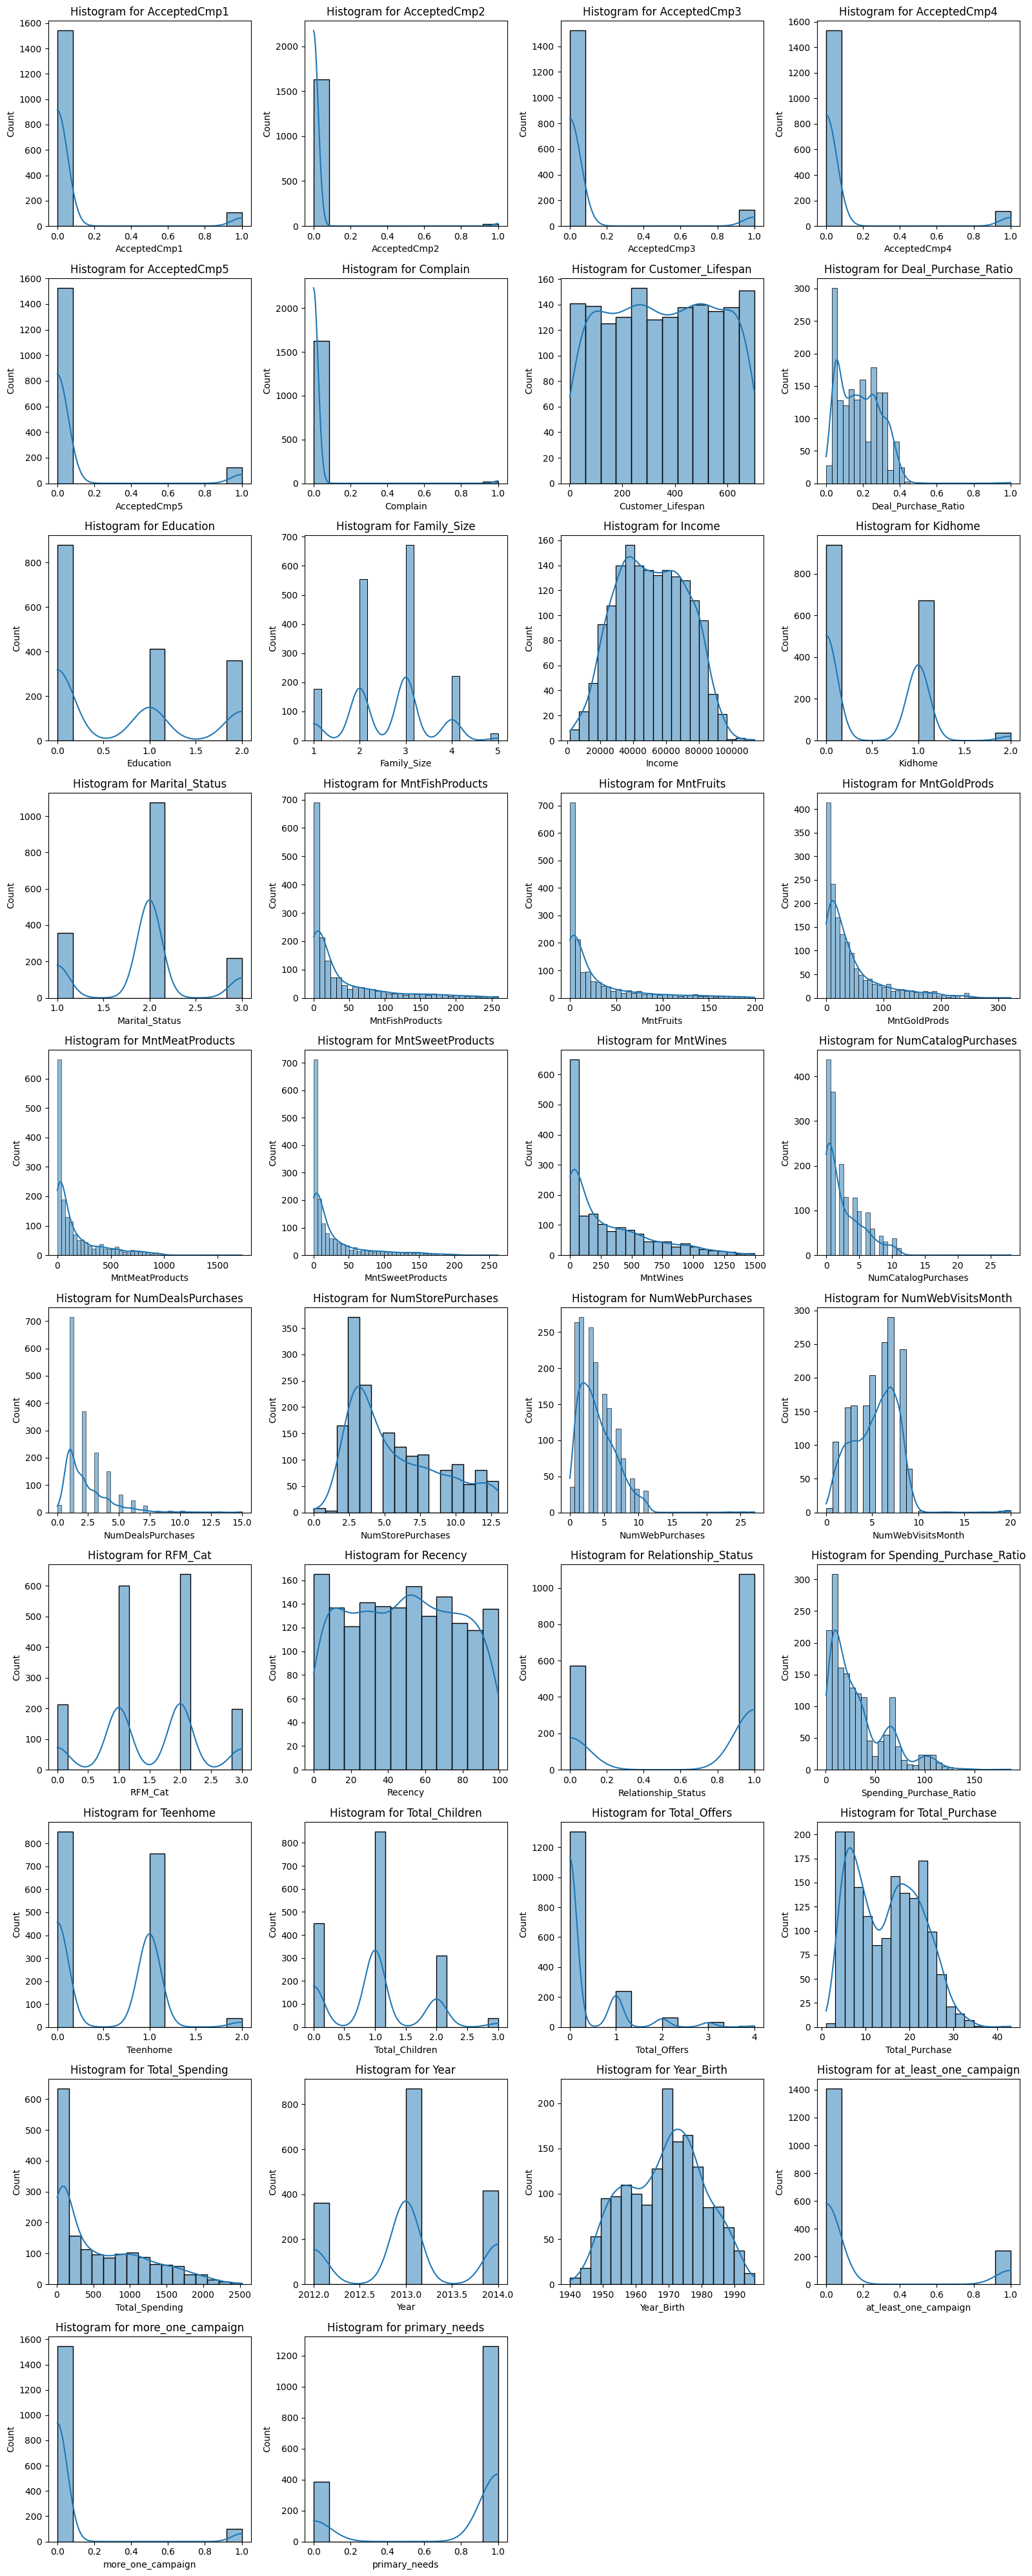

Skewness  Kurtosis             Type of Distribution  \
Feature                                                                        
AcceptedCmp1                3.531    10.471             Bimodal Distribution   
AcceptedCmp2                8.911    77.412             Bimodal Distribution   
AcceptedCmp3                3.188     8.162             Bimodal Distribution   
AcceptedCmp4                3.341     9.162             Bimodal Distribution   
AcceptedCmp5                3.254     8.588             Bimodal Distribution   
Complain                    9.151    81.749             Bimodal Distribution   
Customer_Lifespan          -0.011    -1.211  Normal Distribution (Symmetric)   
Deal_Purchase_Ratio         0.831     3.209                Positively Skewed   
Education                   0.628    -1.187                Positively Skewed   
Family_Size                 0.080    -0.306             Bimodal Distribution   
Income                      0.023    -0.834  Normal Distribution (Symmetric)   
Kidhome                     0.615    -0.780             Bimodal Distribution   
Marital_Status              0.012    -0.121  Normal Distribution (Symmetric)   
MntFishProducts             1.907     3.028         Highly Positively Skewed   
MntFruits                   2.062     3.804         Highly Positively Skewed   
MntGoldProds                1.877     3.402         Highly Positively Skewed   
MntMeatProducts             1.836     3.341         Highly Positively Skewed   
MntSweetProducts            2.082     3.989         Highly Positively Skewed   
MntWines                    1.223     0.718         Highly Positively Skewed   
NumCatalogPurchases         1.445     3.827         Highly Positively Skewed   
NumDealsPurchases           2.415     9.008         Highly Positively Skewed   
NumStorePurchases           0.722    -0.612                Positively Skewed   
NumWebPurchases             1.386     5.602         Highly Positively Skewed   
NumWebVisitsMonth           0.367     2.552                Negatively Skewed   
RFM_Cat                    -0.035    -0.665  Normal Distribution (Symmetric)   
Recency                     0.014    -1.176  Normal Distribution (Symmetric)   
Relationship_Status        -0.640    -1.591                Positively Skewed   
Spending_Purchase_Ratio     1.333     1.548         Highly Positively Skewed   
Teenhome                    0.412    -0.975             Bimodal Distribution   
Total_Children              0.407    -0.198             Bimodal Distribution   
Total_Offers                2.681     7.691         Highly Positively Skewed   
Total_Purchase              0.244    -0.977                Positively Skewed   
Total_Spending              0.885    -0.298                Positively Skewed   
Year                       -0.043    -0.880             Bimodal Distribution   
Year_Birth                 -0.088    -0.794  Normal Distribution (Symmetric)   
at_least_one_campaign       2.002     2.009             Bimodal Distribution   
more_one_campaign           3.636    11.223             Bimodal Distribution   
primary_needs              -1.251    -0.435                Positively Skewed   

                         Normalization Advice  
Feature                                        
AcceptedCmp1             PowerTransformer/Log  
AcceptedCmp2             PowerTransformer/Log  
AcceptedCmp3             PowerTransformer/Log  
AcceptedCmp4             PowerTransformer/Log  
AcceptedCmp5             PowerTransformer/Log  
Complain                 PowerTransformer/Log  
Customer_Lifespan           No Transformation  
Deal_Purchase_Ratio              MinMaxScaler  
Education                        MinMaxScaler  
Family_Size                 No Transformation  
Income                      No Transformation  
Kidhome                          MinMaxScaler  
Marital_Status              No Transformation  
MntFishProducts          PowerTransformer/Log  
MntFruits                PowerTransformer/Log  
MntGoldP

In [269]:
# identifikasi feature sebelum ditransformasi
result_table = assess_distribution_multi(data_train, cols_to_transform, show_plot=True)[0]
result_table

In [270]:
log_cols = list(result_table[result_table['Normalization Advice'] == 'PowerTransformer/Log'].index)
norm_cols = list(result_table[result_table['Normalization Advice'] == 'MinMaxScaler'].index)

print(f'log transformation: {log_cols}')
print(f'normalisasi: {norm_cols}')

log transformation: ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumWebPurchases', 'Spending_Purchase_Ratio', 'Total_Offers', 'at_least_one_campaign', 'more_one_campaign']
normalisasi: ['Deal_Purchase_Ratio', 'Education', 'Kidhome', 'NumStorePurchases', 'NumWebVisitsMonth', 'Relationship_Status', 'Teenhome', 'Total_Children', 'Total_Purchase', 'Total_Spending', 'primary_needs']


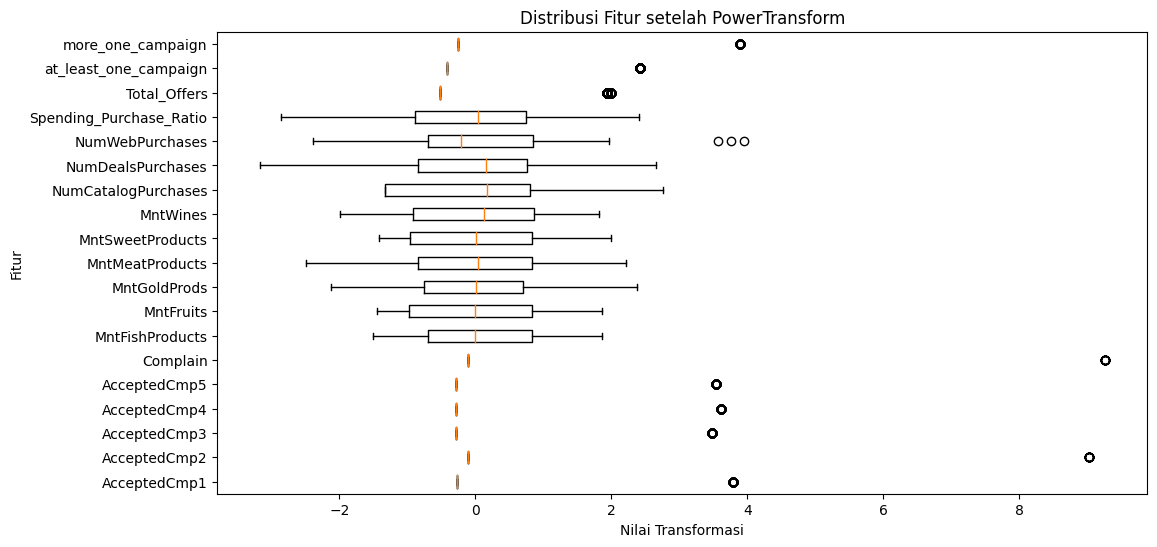

In [271]:
# menggunakan powertransformer untuk transformasi features pada log_cols
from sklearn.preprocessing import PowerTransformer

# melakukan transformasi
scaler = PowerTransformer(method='yeo-johnson')
data_train[log_cols] = scaler.fit_transform(data_train[log_cols])
data_test[log_cols] = scaler.transform(data_test[log_cols])

# menampilkan distribusi fitur-fitur setelah PowerTransform
plt.figure(figsize=(12, 6))
plt.boxplot(data_train[log_cols], vert=False, labels=data_train[log_cols].columns)
plt.title('Distribusi Fitur setelah PowerTransform')
plt.xlabel('Nilai Transformasi')
plt.ylabel('Fitur')
plt.show()

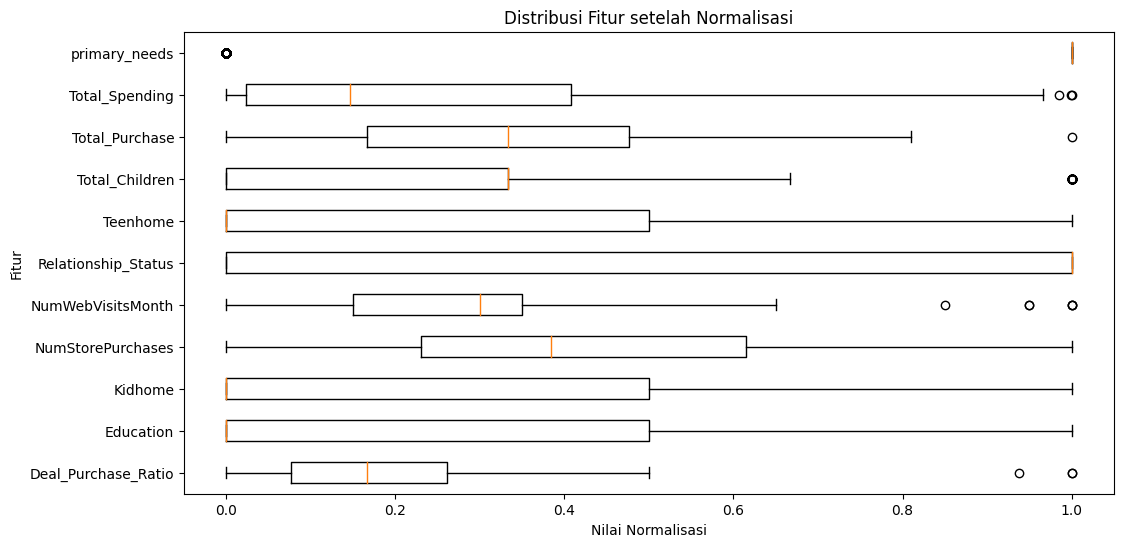

In [272]:
# menggunakan powertransformer untuk transformasi features
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data_train[norm_cols] = minmax.fit_transform(data_train[norm_cols])
data_test[norm_cols] = minmax.transform(data_test[norm_cols])

# menampilkan distribusi fitur-fitur setelah Normalisasi
plt.figure(figsize=(12, 6))
plt.boxplot(data_train[norm_cols], vert=False,
            labels=data_train[norm_cols].columns)
plt.title('Distribusi Fitur setelah Normalisasi')
plt.xlabel('Nilai Normalisasi')
plt.ylabel('Fitur')
plt.show()

## **4.7 Feature Selection** <a id=4.7></a>

In [273]:
# memisahkan feature berdasarkan tipe data cat/object dan numerik
num_cols = []
cat_cols = []

# melakukan perulangan setiap feature sesuai dengan tipe data
for col in data_before_encoding.drop(['Response','feature'], axis=1).columns:
    if data_before_encoding[col].dtype == 'int64' or data_before_encoding[col].dtype == 'float64':
        num_cols.append(col)
    elif data_before_encoding[col].dtype == 'object' or data_before_encoding[col].dtype == 'category':
        cat_cols.append(col)

# print hasilnya yang disimpan pada masing-masing feature
print(f'Total Numeric Columns : {len(num_cols)}')
print(f'Total Object Columns  : {len(cat_cols)}')

Total Numeric Columns : 33
Total Object Columns  : 5


### **4.7.1 Based on Anova (Numerical-Categorical)** <a id=4.7.1></a>

In [274]:
# memisahkan X dan y sebagai feature dan target
X_train = data_train.drop('Response', axis=1)
y_train = data_train['Response']

X_test = data_test.drop('Response', axis=1)
y_test = data_test['Response']


Tabel Feature yang Dipilih:
                    Feature  F_Statistic       P_Value
23             Total_Offers   292.373006  1.835470e-60
27        more_one_campaign   246.157183  8.332075e-52
14             AcceptedCmp5   212.448003  2.363466e-45
15             AcceptedCmp1   179.074224  7.643053e-39
22           Total_Spending   126.699997  2.281261e-28
12             AcceptedCmp3   118.700317  9.721559e-27
11      NumCatalogPurchases   102.398177  2.159944e-23
24  Spending_Purchase_Ratio    98.001782  1.750366e-22
18              Family_Size    95.648147  5.379007e-22
6           MntMeatProducts    93.846780  1.271728e-21
3                   Recency    80.756569  6.823586e-19
26    at_least_one_campaign    66.710987  6.192657e-16
9              MntGoldProds    65.667004  1.030405e-15
4                  MntWines    64.506086  1.816035e-15
19        Customer_Lifespan    59.696130  1.911319e-14
17           Total_Children    59.358758  2.255200e-14
13             AcceptedCmp4    54.31

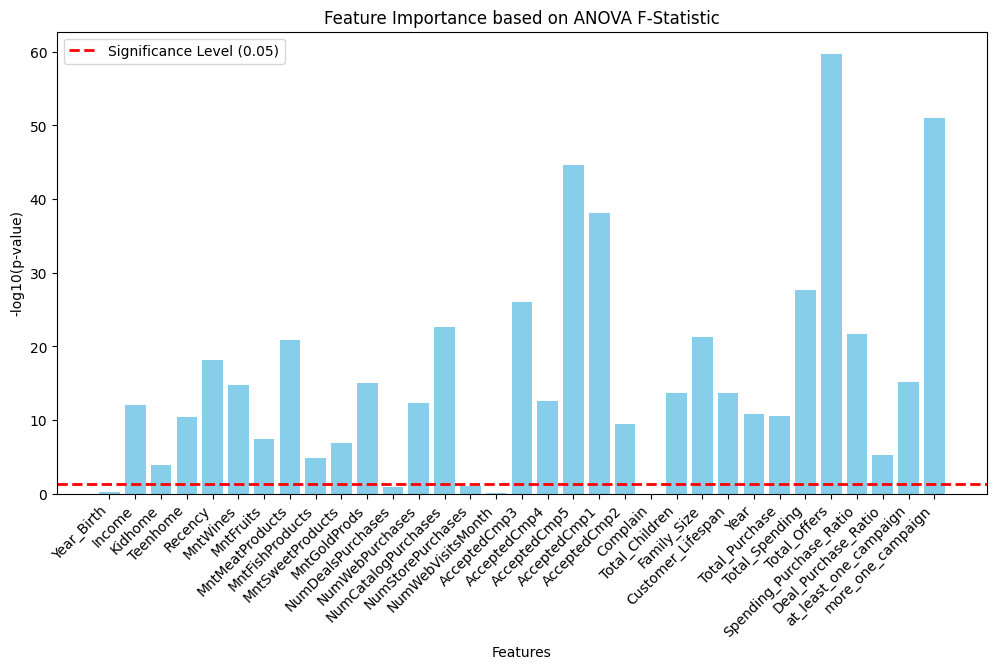

In [275]:
# melakukan features selection menggunakan f_classif (anova)
from sklearn.feature_selection import f_classif

# menghitung nilai F-statistic dan p-value untuk setiap feature
f_statistic, p_values = f_classif(X_train[num_cols], y_train)

# menentukan tingkat signifikansi (alpha)
alpha = 0.05

# memilih feature yang memiliki p-value kurang dari 0.05 (95%, tingkat signifikansi umumnya digunakan)
selected_features_indices = np.where(p_values < alpha)[0]
selected_feature_names = X_train[num_cols].columns[selected_features_indices].tolist()

# membuat DataFrame dengan informasi F-statistic dan p-value untuk fitur yang dipilih
selected_features_anova = pd.DataFrame({
    'Feature': selected_feature_names,
    'F_Statistic': f_statistic[selected_features_indices],
    'P_Value': p_values[selected_features_indices]
})
# mengurutkan DataFrame berdasarkan F-statistic secara descending
selected_features_anova = selected_features_anova.sort_values(by='F_Statistic', ascending=False)

# menampilkan feature yang dipilih beserta skor F-statistic dalam bentuk tabel
print("\nTabel Feature yang Dipilih:")
print(selected_features_anova)

# menampilkan skor dalam bentuk plot
plt.figure(figsize=(12, 6))
plt.bar(X_train[num_cols].columns, -np.log10(p_values), color='skyblue')
plt.axhline(-np.log10(alpha), color='red', linestyle='dashed', linewidth=2, label=f'Significance Level ({alpha})')
plt.title('Feature Importance based on ANOVA F-Statistic')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [276]:
X_train_anova = X_train.loc[:,selected_feature_names]
X_test_anova = X_test.loc[:,selected_feature_names]

### **4.7.2 Based on Anova (Categorical-Categorical)** <a id=4.7.2></a>


Tabel Feature yang Dipilih:
               Feature  Chi_Statistic       P_Value
2              RFM_Cat      80.756569  6.823586e-19
1  Relationship_Status      14.569459  1.400886e-04
0            Education       0.334054  5.633609e-01


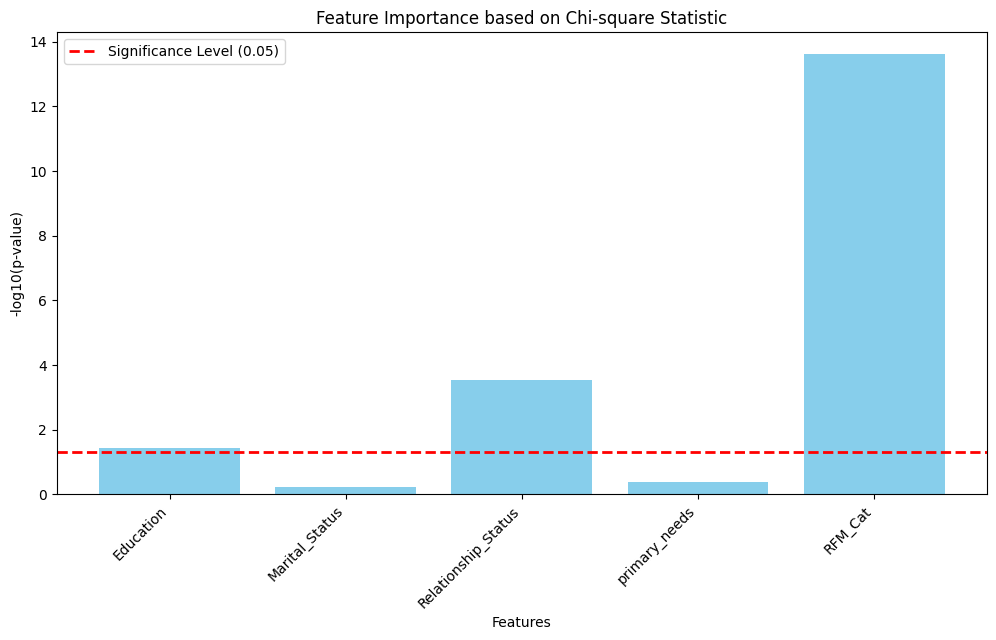

In [277]:
# melakukan features selection menggunakan chi-square test
from sklearn.feature_selection import chi2

# menghitung chi-square statistic dan p-value untuk setiap feature
chi2_stat, p_values_chi2 = chi2(X_train[cat_cols], y_train)

# menentukan tingkat signifikansi (alpha)
alpha = 0.05

# memilih feature yang memiliki p-value kurang dari 0.05 (95% confidence level)
selected_features_chi2_indices = np.where(p_values_chi2 < alpha)[0]
selected_features_chi2_names = X_train[cat_cols].columns[selected_features_chi2_indices].tolist()

# membuat DataFrame dengan informasi Chi-statistic dan p-value untuk fitur yang dipilih
selected_features_chi = pd.DataFrame({
    'Feature': selected_features_chi2_names,
    'Chi_Statistic': f_statistic[selected_features_chi2_indices],
    'P_Value': p_values[selected_features_chi2_indices]
})
# mengurutkan DataFrame berdasarkan F-statistic secara descending
selected_features_chi = selected_features_chi.sort_values(by='Chi_Statistic', ascending=False)

# menampilkan feature yang dipilih beserta skor F-statistic dalam bentuk tabel
print("\nTabel Feature yang Dipilih:")
print(selected_features_chi)

# menampilkan skor dalam bentuk plot
plt.figure(figsize=(12, 6))
plt.bar(X_train[cat_cols].columns, -np.log10(p_values_chi2), color='skyblue')
plt.axhline(-np.log10(alpha), color='red', linestyle='dashed', linewidth=2, label=f'Significance Level ({alpha})')
plt.title('Feature Importance based on Chi-square Statistic')
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [278]:
X_train_chi2 = X_train.loc[:,selected_features_chi2_names]
X_test_chi2 = X_test.loc[:,selected_features_chi2_names]

In [279]:
# concat selected features from anova dan chi2
X_train = pd.concat([X_train_anova, X_train_chi2], axis=1)
X_test = pd.concat([X_test_anova, X_test_chi2], axis=1)

### **4.7.3 Redundancy Analysis** <a id=4.7.3></a>

In [280]:
from sklearn.metrics import precision_score
from sklearn.feature_selection import mutual_info_classif
best_k = 0
best_score = 0

for k in range(15,26):

    selector = SelectKBest(mutual_info_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)

    if X_train_selected.shape[1] > 0:

        model = RandomForestClassifier(random_state=42)
        model.fit(X_train_selected, y_train)

        X_test_selected = selector.transform(X_test)
        y_pred = model.predict(X_test_selected)
        score = precision_score(y_test, y_pred)

        if score > best_score:
            best_score = score
            best_k = k

print(f"K terbaik: {best_k}, Precision Terbaik: {best_score:.4f}")

K terbaik: 22, Precision Terbaik: 0.6486



Tabel Feature yang Dipilih:
                    feature    scores
15             Total_Offers  0.064847
19        more_one_campaign  0.060364
4              MntGoldProds  0.046374
6       NumCatalogPurchases  0.044770
16  Spending_Purchase_Ratio  0.042086
3           MntMeatProducts  0.039993
8              AcceptedCmp5  0.039262
14           Total_Spending  0.039133
10           Total_Children  0.035443
21                  RFM_Cat  0.033235
5           NumWebPurchases  0.032289
2                  MntWines  0.029245
11              Family_Size  0.026819
0                    Income  0.025870
9              AcceptedCmp1  0.025051
18    at_least_one_campaign  0.023886
12        Customer_Lifespan  0.022613
13           Total_Purchase  0.022168
7              AcceptedCmp3  0.019854
17      Deal_Purchase_Ratio  0.016229
1                   Recency  0.015834
20      Relationship_Status  0.013653


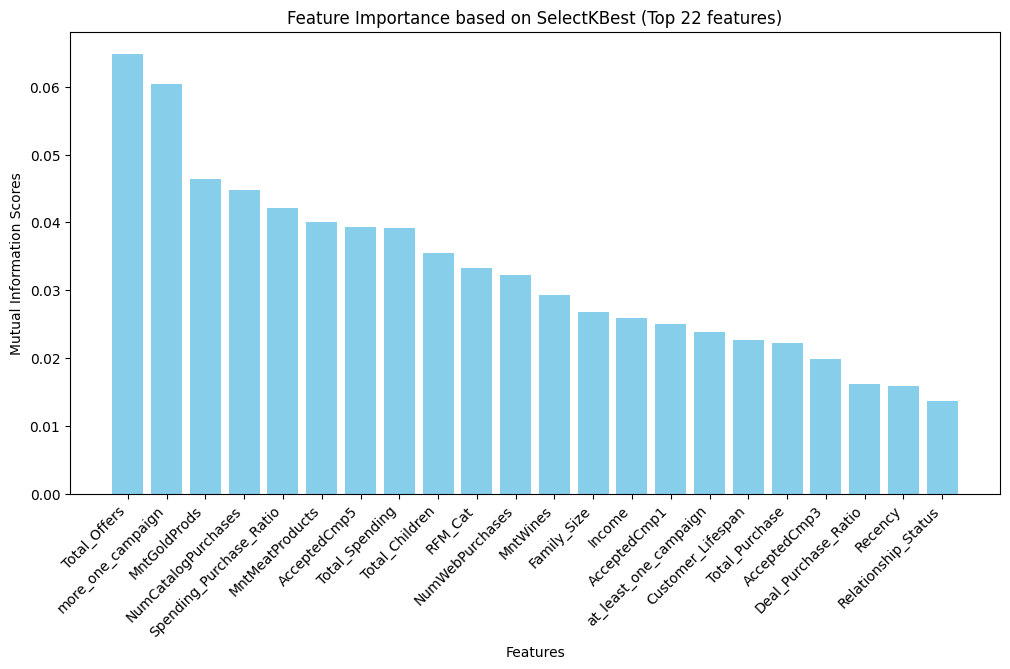

In [293]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# definisi X_train dan y_train
# ...

# jumlah fitur yang ingin dipilih
k_best_features = best_k

# menggunakan SelectKBest dengan mutual_info_classif
k_best_selector = SelectKBest(mutual_info_classif, k=k_best_features)
X_train_k_best = k_best_selector.fit_transform(X_train, y_train)

# mendapatkan indeks fitur yang terpilih
selected_features_indices = k_best_selector.get_support(indices=True)

# mendapatkan nama fitur yang terpilih
selected_feature_names = X_train.columns[selected_features_indices].tolist()

# membuat DataFrame dengan informasi mutual information untuk fitur yang dipilih
selected_features_k_best = pd.DataFrame({
    'feature': selected_feature_names,
    'scores': k_best_selector.scores_[selected_features_indices]
})

# mengurutkan DataFrame berdasarkan mutual information secara descending
selected_features_k_best = selected_features_k_best.sort_values(by='scores', ascending=False)

# menampilkan feature yang dipilih beserta skor mutual information dalam bentuk tabel
print("\nTabel Feature yang Dipilih:")
print(selected_features_k_best)

# menampilkan skor dalam bentuk plot
plt.figure(figsize=(12, 6))
plt.bar(selected_features_k_best['feature'], selected_features_k_best['scores'], color='skyblue')
plt.title(f'Feature Importance based on SelectKBest (Top {k_best_features} features)')
plt.xlabel('Features')
plt.ylabel('Mutual Information Scores')  # mengganti label y-axis
plt.xticks(rotation=45, ha='right')
plt.show()

#### **Variance Inflation Factor (VIF)**

VIF mengukur seberapa jauh variabilitas suatu variabel independen dapat dijelaskan oleh variabel independen lain dalam model. Sebagai aturan umum, nilai VIF yang tinggi (biasanya di atas 10) menunjukkan adanya masalah multikolinearitas, yang dapat mempengaruhi interpretasi model dan membuat estimasi koefisien menjadi tidak stabil.

##### Langkah-langkah Feature Selection dengan VIF:

1. **Seleksi Awal Fitur:**
   - Lakukan seleksi awal fitur yang ingin dievaluasi dalam model regresi logistik.

2. **Engineering Fitur (Opsional):**
   - Jika diperlukan, Anda dapat membuat fitur baru atau melakukan engineering pada fitur yang ada.

3. **Perhitungan VIF:**
   - Hitung VIF untuk setiap variabel independen dalam model regresi logistik. Biasanya, perangkat lunak statistik seperti Python (menggunakan pustaka seperti Statsmodels atau Scikit-learn) atau R menyediakan fungsi untuk menghitung VIF.

4. **Evaluasi VIF:**
   - Evaluasi nilai VIF untuk setiap variabel. Jika nilai VIF melebihi batas tertentu (misalnya, 10), pertimbangkan untuk menghapus variabel tersebut.

5. **Pemodelan Ulang:**
   - Hapus variabel dengan nilai VIF tinggi dan refit model regresi logistik.

6. **Ulangi Langkah 3-5:**
   - Ulangi proses perhitungan VIF dan pemodelan ulang sampai tidak ada lagi variabel dengan nilai VIF yang tinggi.

7. **Evaluasi Kinerja:**
   - Evaluasi kinerja model regresi logistik yang telah di-fit ulang setelah seleksi fitur menggunakan VIF.


In [282]:
# default feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(
        df.values, i) for i in range(df.shape[1])]
    return vif_data

vif_results = calculate_vif(X_train[selected_feature_names])
print(f'Avg. VIF Score: {(sum(vif_results["VIF"]/len(vif_results)))}')
vif_results

Avg. VIF Score: 490540.08822727663


Feature           VIF
0                    Income  6.072868e+00
1                   Kidhome  3.017963e+00
2                  MntWines  1.288884e+01
3           MntMeatProducts  1.041846e+01
4              MntGoldProds  2.594825e+00
5           NumWebPurchases  3.143823e+00
6       NumCatalogPurchases  5.211826e+00
7              AcceptedCmp3  1.266840e+01
8              AcceptedCmp4  1.280350e+01
9              AcceptedCmp5  1.110481e+01
10             AcceptedCmp1  9.829085e+00
11           Total_Children  1.088710e+02
12              Family_Size  5.526401e+02
13        Customer_Lifespan  1.217927e+00
14           Total_Spending  9.014238e+00
15             Total_Offers  5.126044e+06
16  Spending_Purchase_Ratio  2.008915e+01
17      Deal_Purchase_Ratio  3.564921e+00
18    at_least_one_campaign  3.810943e+06
19        more_one_campaign  1.854052e+06
20      Relationship_Status  5.471427e+01
21                  RFM_Cat  2.922084e+00

In [296]:
# vif score setelah menghapus beberapa feature
vif_results = calculate_vif(
    X_train[selected_feature_names].drop(['Spending_Purchase_Ratio', 'at_least_one_campaign',
                                          'Total_Spending', 'Total_Purchase', 'more_one_campaign',
                                          'Income', 'Family_Size','Deal_Purchase_Ratio'], axis=1))
print(f'Avg. VIF Score: {(sum(vif_results["VIF"]/len(vif_results)))}')
vif_results

Avg. VIF Score: 3.4913412803840322


Feature       VIF
0               Recency  3.042867
1              MntWines  5.538016
2       MntMeatProducts  5.603630
3          MntGoldProds  2.004252
4       NumWebPurchases  2.505467
5   NumCatalogPurchases  5.007321
6          AcceptedCmp3  1.842999
7          AcceptedCmp5  1.743514
8          AcceptedCmp1  1.526316
9        Total_Children  3.785204
10    Customer_Lifespan  4.307159
11         Total_Offers  3.193541
12  Relationship_Status  2.818932
13              RFM_Cat  5.959560

In [308]:
# membuat variabel untuk feature selection dan menambah beberapa feature
selected_features_final = X_train[selected_feature_names].drop(['Spending_Purchase_Ratio', 'at_least_one_campaign',
                                                                'Total_Spending', 'Total_Purchase', 'more_one_campaign',
                                                                'Income', 'Family_Size','Deal_Purchase_Ratio'], axis=1).columns
selected_features_final = list(selected_features_final)
selected_features_final.append('AcceptedCmp2')
selected_features_final.append('AcceptedCmp4')
selected_features_final.append('MntFruits')

In [309]:
# vif score setalah penambahan feature
vif_results = calculate_vif(
    X_train[selected_features_final])
print(f'Avg. VIF Score: {(sum(vif_results["VIF"]/len(vif_results)))}')
vif_results

Avg. VIF Score: 3.568806872225212


Feature       VIF
0               Recency  3.054826
1              MntWines  5.980497
2       MntMeatProducts  6.564739
3          MntGoldProds  2.090503
4       NumWebPurchases  2.521329
5   NumCatalogPurchases  5.060327
6          AcceptedCmp3  2.870500
7          AcceptedCmp5  1.830245
8          AcceptedCmp1  1.622926
9        Total_Children  3.900620
10    Customer_Lifespan  4.309492
11         Total_Offers  6.041355
12  Relationship_Status  2.825440
13              RFM_Cat  6.032342
14         AcceptedCmp2  1.124760
15         AcceptedCmp4  2.481471
16            MntFruits  2.358346

## **4.8 Imbalance Handling** <a id=4.8></a>

In [310]:
# melakukan imbalace handling pada target
from imblearn.over_sampling import SMOTE

# menampikan jumlah kelas sebelum oversampling
print("Jumlah kelas sebelum oversampling:")
print("Kelas 0:", sum(y_train == 0))
print("Kelas 1:", sum(y_train == 1))

# melakukan oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# menampilkan jumlah kelas setelah oversampling
print("\nJumlah kelas setelah oversampling:")
print("Kelas 0:", sum(y_resampled == 0))
print("Kelas 1:", sum(y_resampled == 1))

Jumlah kelas sebelum oversampling:
Kelas 0: 1397
Kelas 1: 251

Jumlah kelas setelah oversampling:
Kelas 0: 1397
Kelas 1: 1397


# **5. Machine Learning Modelling & Evaluation** <a id=5></a>
[back to top](#100)

## **5.1 Modelling** <a id=5.1></a>

In [312]:
# mendefinisikan X (features) dan y (target), dimana X dan y hasil dari imbalance handling sebelumnya
X_train = X_resampled
y_train = y_resampled

In [313]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def predict_and_evaluate_models_classification(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(random_state=42),
        KNeighborsClassifier(n_neighbors=42, metric='minkowski', p=2),
        DecisionTreeClassifier(criterion='entropy', random_state=42),
        SVC(kernel='linear', random_state=42),
        RandomForestClassifier(random_state=42),
        GaussianNB(),
        XGBClassifier(objective='binary:logistic', random_state=42),
        LGBMClassifier(random_state=42, verbosity=0)
    ]

    results_list = []
    conf_matrices = []

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
    fig.suptitle('Confusion Matrices for Each Model', fontsize=16)

    for i, model in enumerate(models):
        row = i // 4
        col = i % 4

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        precision = precision_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results = {
            "Model": type(model).__name__,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1
        }

        conf_matrix = confusion_matrix(y_test, y_pred)
        conf_matrices.append(conf_matrix)

        results_list.append(results)

        # mengatur color palette
        cmap = sns.diverging_palette(10, 240, as_cmap=True)

        # plot confusion matrix
        sns.heatmap(conf_matrix, annot=True, fmt='d',
                    cmap=cmap, ax=axes[row, col])
        axes[row, col].set_title(type(model).__name__)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    # membuat dataFrame dari hasil evaluasi
    results_df = pd.DataFrame(results_list)
    results_df.set_index("Model", inplace=True)

    return results_df, conf_matrices

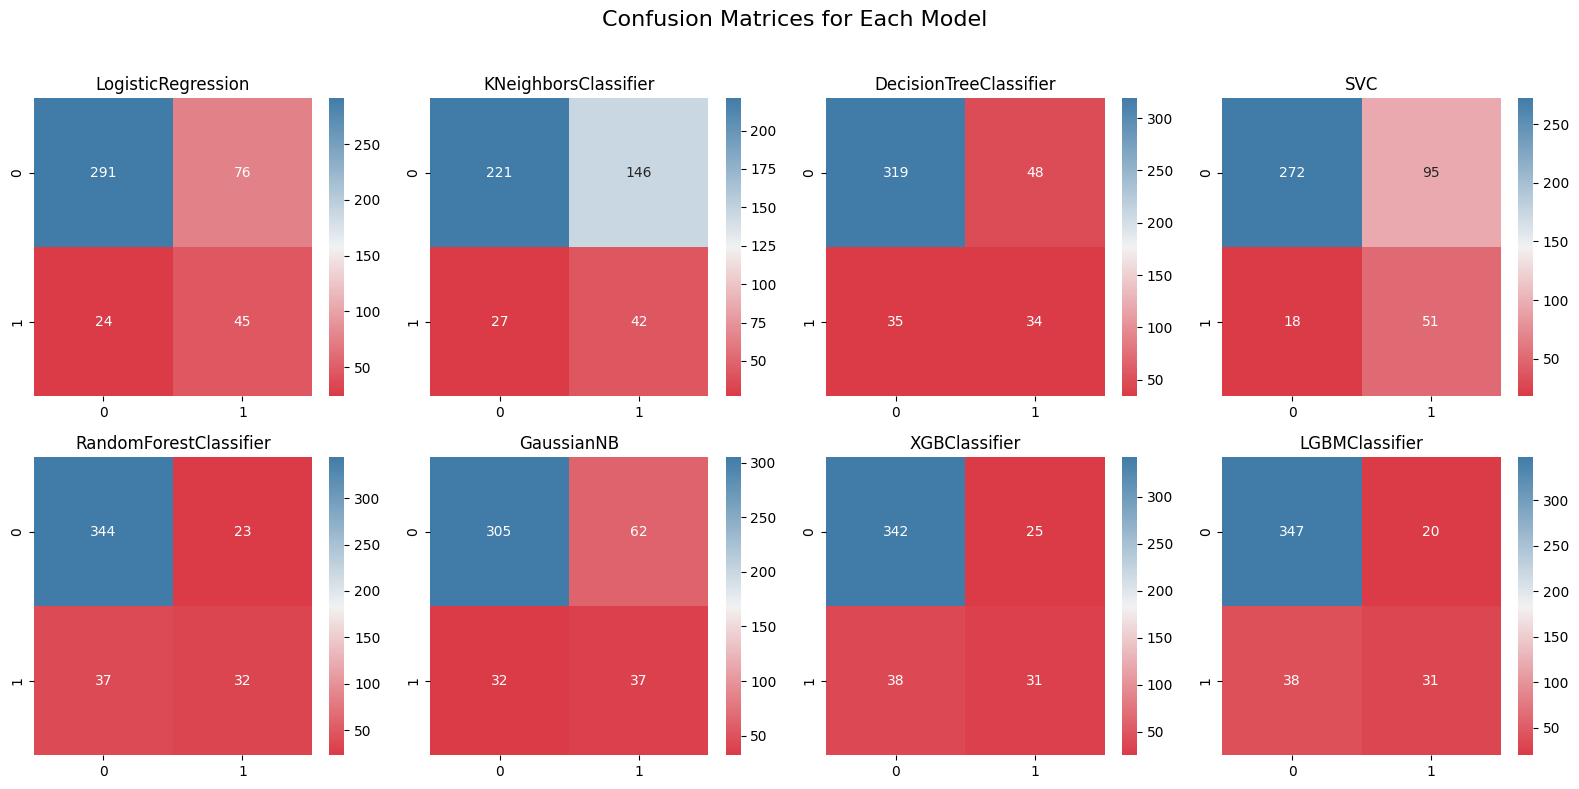

In [314]:
# memanggil function untuk memprediksi dan mengevaluasi berbagai model classification
results_df_classification, conf_matrices = predict_and_evaluate_models_classification(X_train, y_train, X_test, y_test)

## **5.2 Evaluation** <a id=5.2></a>

In [315]:
# menampilkan hasil evaluasi untuk semua model classification
print("\nOverall Results:")
print(results_df_classification)


Overall Results:
                        Accuracy  Precision    Recall  F1-Score
Model                                                          
LogisticRegression      0.770642   0.836466  0.770642  0.793284
KNeighborsClassifier    0.603211   0.785457  0.603211  0.656686
DecisionTreeClassifier  0.809633   0.824139  0.809633  0.816111
SVC                     0.740826   0.844779  0.740826  0.772048
RandomForestClassifier  0.862385   0.852076  0.862385  0.855905
GaussianNB              0.784404   0.820962  0.784404  0.799060
XGBClassifier           0.855505   0.845175  0.855505  0.849248
LGBMClassifier          0.866972   0.854857  0.866972  0.858587


# **6. Summary** <a id=6></a>
[back to top](#100)